## **Importing Libraries**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

Loading the dataset in colab

In [1]:
application_file_location ="/content/drive/MyDrive/DataSet/application_data (new).csv"

In [3]:
df_data = pd.read_csv(application_file_location)

In [4]:
previous_file_location = "/content/drive/MyDrive/DataSet/previous_application (1).csv"

In [5]:
pre_df_data = pd.read_csv(previous_file_location )

Understanding Structure of Data

In [6]:
# DataFrame dimensions
df_data.shape

(49999, 122)

In [7]:
df_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [8]:
df_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# **Data Cleaning and Replacing Missing Values**

In [9]:
null_data1 = df_data.isnull().sum()/49999*100

In [10]:
null_data1

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.468269
AMT_REQ_CREDIT_BUREAU_WEEK    13.468269
AMT_REQ_CREDIT_BUREAU_MON     13.468269
AMT_REQ_CREDIT_BUREAU_QRT     13.468269
AMT_REQ_CREDIT_BUREAU_YEAR    13.468269
Length: 122, dtype: float64

In [11]:
threshold = 40
drop_col = null_data1[null_data1 > threshold].index

In [12]:
drop_col.size

49

In [13]:
df_data_filter = df_data.drop(columns = drop_col)

In [14]:
df_data_filter.shape

(49999, 73)

In [15]:
df_data_filter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
columns_drop = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
 'FLAG_EMAIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21', 'EXT_SOURCE_2', 'EXT_SOURCE_3']


In [17]:
df_data_filter = df_data_filter.drop(columns = columns_drop)

In [18]:
df_data_filter.shape

(49999, 45)

In [19]:
df_data_filter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
columns_convert = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']

df_data_filter[columns_convert] = df_data_filter[columns_convert].abs()

In [21]:
df_data_filter[columns_convert].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,49999.000000,49999.000000,49999.000000,49999.000000,49998.000000
mean,16022.042081,67160.324386,4977.282666,2996.797176,964.296172
std,4361.400270,138957.897110,3525.548305,1509.235410,829.485574
min,7680.000000,0.000000,0.000000,0.000000,0.000000
25%,12378.500000,933.000000,1998.000000,1722.000000,270.000000
50%,15731.000000,2216.000000,4490.000000,3261.000000,755.000000
75%,19644.000000,5718.000000,7463.500000,4297.000000,1573.000000
max,25184.000000,365243.000000,22392.000000,6232.000000,4002.000000


In [22]:
df_data_filter.isnull().sum().sort_values(ascending = True)

SK_ID_CURR                         0
REG_REGION_NOT_LIVE_REGION         0
HOUR_APPR_PROCESS_START            0
WEEKDAY_APPR_PROCESS_START         0
REGION_RATING_CLIENT_W_CITY        0
REGION_RATING_CLIENT               0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
DAYS_ID_PUBLISH                    0
DAYS_REGISTRATION                  0
DAYS_EMPLOYED                      0
DAYS_BIRTH                         0
REGION_POPULATION_RELATIVE         0
NAME_HOUSING_TYPE                  0
NAME_FAMILY_STATUS                 0
NAME_EDUCATION_TYPE                0
NAME_INCOME_TYPE                   0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
AMT_CREDIT                         0
AMT_INCOME_TOTAL                   0
CNT_CHILDREN                       0
FLAG_OWN_REALTY                    0
FLAG_OWN_CAR                       0
CODE_GENDER                        0
NAME_CONTRACT_TYPE                 0
TARGET                             0
R

In [23]:
df_data_filter['DAYS_LAST_PHONE_CHANGE'].describe()

count    49998.000000
mean       964.296172
std        829.485574
min          0.000000
25%        270.000000
50%        755.000000
75%       1573.000000
max       4002.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [24]:
df_data_filter['DAYS_LAST_PHONE_CHANGE'].head()

0    1134.0
1     828.0
2     815.0
3     617.0
4    1106.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [25]:
df_data_filter['DAYS_LAST_PHONE_CHANGE'].fillna(963, inplace=True)

In [26]:
df_data_filter.isnull().sum().sort_values(ascending=True)

SK_ID_CURR                         0
REG_REGION_NOT_LIVE_REGION         0
HOUR_APPR_PROCESS_START            0
WEEKDAY_APPR_PROCESS_START         0
REGION_RATING_CLIENT_W_CITY        0
REGION_RATING_CLIENT               0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
DAYS_ID_PUBLISH                    0
DAYS_REGISTRATION                  0
DAYS_EMPLOYED                      0
DAYS_BIRTH                         0
REGION_POPULATION_RELATIVE         0
NAME_HOUSING_TYPE                  0
NAME_FAMILY_STATUS                 0
NAME_EDUCATION_TYPE                0
NAME_INCOME_TYPE                   0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
DAYS_LAST_PHONE_CHANGE             0
AMT_CREDIT                         0
AMT_INCOME_TOTAL                   0
CNT_CHILDREN                       0
FLAG_OWN_REALTY                    0
FLAG_OWN_CAR                       0
CODE_GENDER                        0
NAME_CONTRACT_TYPE                 0
T

In [27]:
df_data_filter['CNT_FAM_MEMBERS'].head()


0    1.0
1    2.0
2    1.0
3    2.0
4    1.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [28]:
df_data_filter['CNT_FAM_MEMBERS'].describe()

count    49998.000000
mean         2.158946
std          0.911332
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [29]:
df_data_filter.groupby('CNT_FAM_MEMBERS').size()

CNT_FAM_MEMBERS
1.0     10873
2.0     25807
3.0      8635
4.0      4000
5.0       592
6.0        68
7.0        12
8.0         6
9.0         2
10.0        2
13.0        1
dtype: int64

In [30]:
df_data_filter['CNT_FAM_MEMBERS'].fillna(2, inplace=True)


In [31]:
df_data_filter['AMT_ANNUITY'].head(10)


0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
5    27517.5
6    41301.0
7    42075.0
8    33826.5
9    20250.0
Name: AMT_ANNUITY, dtype: float64

In [ ]:
df_data_filter['AMT_ANNUITY'].describe()

count     49998.000000
mean      27107.377355
std       14562.944435
min        2052.000000
25%       16456.500000
50%       24939.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [ ]:
df_data_filter['AMT_ANNUITY'].fillna(27108.5, inplace=True)

In [ ]:
df_data_filter['AMT_ANNUITY'].isnull().sum()

0

In [ ]:
df_data_filter['AMT_GOODS_PRICE'].describe()

count    4.996100e+04
mean     5.390600e+05
std      3.698533e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
df_data_filter['AMT_GOODS_PRICE'].head(10)


0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
5     454500.0
6    1395000.0
7    1530000.0
8     913500.0
9     405000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
df_data_filter['AMT_GOODS_PRICE'].median()

450000.0

In [ ]:
df_data_filter['AMT_GOODS_PRICE'].mean()

539060.0360981566

In [ ]:
df_data_filter['AMT_GOODS_PRICE'].fillna(450000.0, inplace=True)

In [ ]:
df_data_filter['AMT_GOODS_PRICE'].isnull().sum()

0

In [ ]:
df_data_filter[['OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE']].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,49831.000000,49831.000000,49831.000000,49831.000000
mean,1.420782,0.141819,1.403664,0.098332
std,2.302086,0.440540,2.281782,0.357264
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,28.000000,6.000000,28.000000,5.000000


In [ ]:
df_data_filter[['OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE']].head()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,2.0,2.0,2.0,2.0
1,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0
3,2.0,0.0,2.0,0.0
4,0.0,0.0,0.0,0.0


In [ ]:
df_data_filter[['OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE']].median()

OBS_30_CNT_SOCIAL_CIRCLE    0.0
DEF_30_CNT_SOCIAL_CIRCLE    0.0
OBS_60_CNT_SOCIAL_CIRCLE    0.0
DEF_60_CNT_SOCIAL_CIRCLE    0.0
dtype: float64

In [ ]:
df_data_filter['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
df_data_filter['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
df_data_filter['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(1, inplace=True)
df_data_filter['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(1, inplace=True)


In [ ]:
df_data_filter[['OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE']].median()

OBS_30_CNT_SOCIAL_CIRCLE    0.0
DEF_30_CNT_SOCIAL_CIRCLE    0.0
OBS_60_CNT_SOCIAL_CIRCLE    0.0
DEF_60_CNT_SOCIAL_CIRCLE    0.0
dtype: float64

In [ ]:
df_data_filter.isnull().sum().sort_values(ascending=True)

SK_ID_CURR                         0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
DAYS_ID_PUBLISH                    0
REG_CITY_NOT_LIVE_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
OBS_30_CNT_SOCIAL_CIRCLE           0
DEF_30_CNT_SOCIAL_CIRCLE           0
OBS_60_CNT_SOCIAL_CIRCLE           0
DEF_60_CNT_SOCIAL_CIRCLE           0
DAYS_LAST_PHONE_CHANGE             0
REG_CITY_NOT_WORK_CITY             0
DAYS_REGISTRATION                  0
CNT_FAM_MEMBERS                    0
DAYS_BIRTH                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
D

In [ ]:
df_data_filter['NAME_TYPE_SUITE'].head()

0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [ ]:
df_data_filter.groupby('NAME_TYPE_SUITE').size()


NAME_TYPE_SUITE
Children             542
Family              6549
Group of people       36
Other_A              137
Other_B              259
Spouse, partner     1849
Unaccompanied      40435
dtype: int64

In [ ]:
df_data_filter['NAME_TYPE_SUITE'].describe()


count             49807
unique                7
top       Unaccompanied
freq              40435
Name: NAME_TYPE_SUITE, dtype: object

In [ ]:
df_data_filter['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)


In [ ]:
df_data_filter['NAME_TYPE_SUITE'].isnull().sum()

0

In [ ]:
df_data_filter[['AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
count,43265.000000,43265.000000,43265.000000,43265.000000,43265.000000,43265.000000
mean,0.260973,0.007096,0.007512,0.032382,0.270288,1.881035
std,0.606996,0.087709,0.107992,0.194080,0.928560,1.865054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,8.000000,3.000000,6.000000,6.000000,24.000000,25.000000


In [ ]:
df_data_filter[['AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_YEAR']].mode()

,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_data_filter[['AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_YEAR']].head()


,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_data_filter['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace=True)
df_data_filter['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace=True)
df_data_filter['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0, inplace=True)
df_data_filter['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace=True)
df_data_filter['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace=True)
df_data_filter['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0, inplace=True)


In [ ]:
df_data_filter[['AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_YEAR']].isnull().sum()

AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

In [ ]:
df_data_filter['OCCUPATION_TYPE'].describe()

count        34345
unique          18
top       Laborers
freq          8952
Name: OCCUPATION_TYPE, dtype: object

In [ ]:
df_data_filter.groupby('OCCUPATION_TYPE').size()


OCCUPATION_TYPE
Accountants              1621
Cleaning staff            739
Cooking staff             963
Core staff               4434
Drivers                  3044
HR staff                  101
High skill tech staff    1852
IT staff                   80
Laborers                 8952
Low-skill Laborers        357
Managers                 3489
Medicine staff           1403
Private service staff     447
Realty agents             123
Sales staff              5160
Secretaries               212
Security staff           1140
Waiters/barmen staff      228
dtype: int64

In [ ]:
df_data_filter['OCCUPATION_TYPE'].fillna('Laborers', inplace=True)

In [ ]:
df_data_filter['OCCUPATION_TYPE'].isnull().sum()

0

In [ ]:
df_data_filter.isnull().sum().sort_values(ascending=True)

SK_ID_CURR                     0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
DAYS_LAST_PHONE_CHANGE         0
AMT_REQ_CREDIT_BUREAU_HOUR     0
AMT_REQ_CREDIT_BUREAU_DAY      0
AMT_REQ_CREDIT_BUREAU_WEEK     0
AMT_REQ_CREDIT_BUREAU_MON      0
REGION_RATING_CLIENT           0
AMT_REQ_CREDIT_BUREAU_QRT      0
CNT_FAM_MEMBERS                0
DAYS_ID_PUBLISH                0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME

In [ ]:
df_data_filter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_data_filter.nunique().sort_values()

REG_REGION_NOT_LIVE_REGION         2
TARGET                             2
NAME_CONTRACT_TYPE                 2
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
LIVE_REGION_NOT_WORK_REGION        2
REG_CITY_NOT_LIVE_CITY             2
REG_CITY_NOT_WORK_CITY             2
LIVE_CITY_NOT_WORK_CITY            2
REG_REGION_NOT_WORK_REGION         2
CODE_GENDER                        3
REGION_RATING_CLIENT_W_CITY        3
REGION_RATING_CLIENT               3
AMT_REQ_CREDIT_BUREAU_HOUR         4
NAME_EDUCATION_TYPE                5
NAME_HOUSING_TYPE                  6
DEF_60_CNT_SOCIAL_CIRCLE           6
NAME_FAMILY_STATUS                 6
DEF_30_CNT_SOCIAL_CIRCLE           7
NAME_TYPE_SUITE                    7
AMT_REQ_CREDIT_BUREAU_DAY          7
AMT_REQ_CREDIT_BUREAU_WEEK         7
WEEKDAY_APPR_PROCESS_START         7
NAME_INCOME_TYPE                   8
AMT_REQ_CREDIT_BUREAU_QRT          9
CNT_CHILDREN                      11
CNT_FAM_MEMBERS                   11
O

In [ ]:
df_data_filter.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION                int64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_STAR

In [ ]:
df_data_filter.to_csv("/content/drive/MyDrive/DataSet/application_data (2).csv", index =False)

Previous Application Data: Data Cleaning and
Replacing Missing Values

In [ ]:
pre_df_data.shape

(49999, 37)

In [ ]:
pre_df_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
null_data2 = pre_df_data.isnull().sum()/49999*100

In [ ]:
null_data2

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    21.184424
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               50.397008
AMT_GOODS_PRICE                21.488430
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              50.397008
RATE_INTEREST_PRIMARY          99.669993
RATE_INTEREST_PRIVILEGED       99.669993
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                48.486970
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [ ]:
threshold = 40
drop_col2 = null_data2[null_data2 > threshold].index

In [ ]:
drop_col2.size

5

In [ ]:
pre_df_data_filtered = pre_df_data.drop(columns=drop_col2)

In [ ]:
pre_df_data_filtered.shape

(49999, 32)

In [ ]:
pre_df_data_filtered.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns_drop1 = ['DAYS_TERMINATION','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','NFLAG_INSURED_ON_APPROVAL']

pre_df_data_filtered = pre_df_data_filtered.drop(columns=columns_drop1)



In [ ]:
pre_df_data_filtered.shape

(49999, 22)

In [ ]:
pre_df_data_filtered.head(10)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,73,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,164,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,301,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,512,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,781,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,Everyday expenses,Approved,684,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,XNA,Canceled,14,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,XNA,Canceled,21,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,XNA,Canceled,386,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,XNA,Canceled,57,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash


In [ ]:
columns_convert1 = ['DAYS_DECISION']
pre_df_data_filtered[columns_convert1] = pre_df_data_filtered[columns_convert1].abs()

In [ ]:
pre_df_data_filtered[columns_convert1].describe()

,DAYS_DECISION
count,49999.000000
mean,900.112622
std,786.531303
min,2.000000
25%,292.000000
50%,599.000000
75%,1335.000000
max,2922.000000


In [ ]:
pre_df_data_filtered.isnull().sum().sort_values(ascending=True)


SK_ID_PREV                    0
NAME_SELLER_INDUSTRY          0
SELLERPLACE_AREA              0
CHANNEL_TYPE                  0
NAME_PRODUCT_TYPE             0
NAME_PORTFOLIO                0
NAME_GOODS_CATEGORY           0
NAME_CLIENT_TYPE              0
CODE_REJECT_REASON            0
NAME_YIELD_GROUP              0
NAME_PAYMENT_TYPE             0
NAME_CONTRACT_STATUS          0
NAME_CASH_LOAN_PURPOSE        0
AMT_CREDIT                    0
AMT_APPLICATION               0
NAME_CONTRACT_TYPE            0
SK_ID_CURR                    0
DAYS_DECISION                 0
PRODUCT_COMBINATION           8
AMT_ANNUITY               10592
CNT_PAYMENT               10592
AMT_GOODS_PRICE           10744
dtype: int64

In [ ]:
pre_df_data_filtered['PRODUCT_COMBINATION'].head(10)


0    POS mobile with interest
1            Cash X-Sell: low
2           Cash X-Sell: high
3         Cash X-Sell: middle
4           Cash Street: high
5            Cash X-Sell: low
6                        Cash
7                        Cash
8                        Cash
9                        Cash
Name: PRODUCT_COMBINATION, dtype: object

In [ ]:
pre_df_data_filtered['PRODUCT_COMBINATION'].describe()


count                           49991
unique                             17
top       POS household with interest
freq                             8510
Name: PRODUCT_COMBINATION, dtype: object

In [ ]:
pre_df_data_filtered['PRODUCT_COMBINATION'].fillna('Cash', inplace=True)

In [ ]:
pre_df_data_filtered['AMT_CREDIT'].isnull().sum()


0

In [ ]:
pre_df_data_filtered['CNT_PAYMENT'].describe()

count    39407.000000
mean        15.555891
std         13.985174
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         60.000000
Name: CNT_PAYMENT, dtype: float64

In [ ]:
pre_df_data_filtered['CNT_PAYMENT'].head(10)

0    12.0
1    36.0
2    12.0
3    12.0
4    24.0
5    18.0
6     NaN
7     NaN
8     NaN
9     NaN
Name: CNT_PAYMENT, dtype: float64

In [ ]:
pre_df_data_filtered['CNT_PAYMENT'].median()


12.0

In [ ]:
pre_df_data_filtered['CNT_PAYMENT'].mode()


0    12.0
Name: CNT_PAYMENT, dtype: float64

In [ ]:
pre_df_data_filtered['CNT_PAYMENT'].mean()


15.555891085340168

In [ ]:
pre_df_data_filtered['CNT_PAYMENT'].fillna(12.0, inplace=True)


In [ ]:
pre_df_data_filtered['CNT_PAYMENT'].isnull().sum()

0

In [ ]:
pre_df_data_filtered['AMT_ANNUITY'].describe()


count     39407.000000
mean      15482.596847
std       14530.971854
min           0.000000
25%        6122.835000
50%       10879.920000
75%       19669.140000
max      234478.395000
Name: AMT_ANNUITY, dtype: float64

In [ ]:
pre_df_data_filtered['AMT_ANNUITY'].head()


0     1730.430
1    25188.615
2    15060.735
3    47041.335
4    31924.395
Name: AMT_ANNUITY, dtype: float64

In [ ]:
pre_df_data_filtered['AMT_ANNUITY'].median()

10879.92

In [ ]:
pre_df_data_filtered['AMT_ANNUITY'].mean()

15482.596847260636

In [ ]:
pre_df_data_filtered['AMT_ANNUITY'].mode()

0    2250.0
Name: AMT_ANNUITY, dtype: float64

In [ ]:
pre_df_data_filtered['AMT_ANNUITY'].fillna(11250.0, inplace=True)

In [ ]:
pre_df_data_filtered['AMT_ANNUITY'].isnull().sum()


0

In [ ]:
pre_df_data_filtered['AMT_GOODS_PRICE'].describe()


count    3.925500e+04
mean     2.151414e+05
std      3.024993e+05
min      0.000000e+00
25%      4.941000e+04
50%      1.040175e+05
75%      2.250000e+05
max      3.826372e+06
Name: AMT_GOODS_PRICE, dtype: float64

count    3.925500e+04
mean     2.151414e+05
std      3.024993e+05
min      0.000000e+00
25%      4.941000e+04
50%      1.040175e+05
75%      2.250000e+05
max      3.826372e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
pre_df_data_filtered['AMT_GOODS_PRICE'].head()


0     17145.0
1    607500.0
2    112500.0
3    450000.0
4    337500.0
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
pre_df_data_filtered['AMT_GOODS_PRICE'].median()


104017.5

In [ ]:
pre_df_data_filtered['AMT_GOODS_PRICE'].mode()

0    45000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
pre_df_data_filtered['AMT_GOODS_PRICE'].mean()

215141.41734887278

In [ ]:
pre_df_data_filtered['AMT_GOODS_PRICE'].fillna(112320.0, inplace=True)


In [ ]:
pre_df_data_filtered['AMT_GOODS_PRICE'].isnull().sum()

0

In [ ]:
pre_df_data_filtered.isnull().sum().sort_values(ascending=True)

SK_ID_PREV                0
CNT_PAYMENT               0
NAME_SELLER_INDUSTRY      0
SELLERPLACE_AREA          0
CHANNEL_TYPE              0
NAME_PRODUCT_TYPE         0
NAME_PORTFOLIO            0
NAME_GOODS_CATEGORY       0
NAME_CLIENT_TYPE          0
CODE_REJECT_REASON        0
NAME_PAYMENT_TYPE         0
DAYS_DECISION             0
NAME_CONTRACT_STATUS      0
NAME_CASH_LOAN_PURPOSE    0
AMT_GOODS_PRICE           0
AMT_CREDIT                0
AMT_APPLICATION           0
AMT_ANNUITY               0
NAME_CONTRACT_TYPE        0
SK_ID_CURR                0
NAME_YIELD_GROUP          0
PRODUCT_COMBINATION       0
dtype: int64

In [ ]:
pre_df_data_filtered.to_csv("/content/drive/MyDrive/DataSet/previous_application (1).csv", index = False)

## **Identify Outliers in the Dataset**

In [ ]:
df_data_filter.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,49999.000000,49999.000000,49999.000000,4.999900e+04,4.999900e+04,49999.000000,4.999900e+04,49999.000000,49999.000000,49999.000000,...,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.00000,49999.000000,49999.000000,49999.000000,49999.000000
mean,129013.210584,0.080522,0.419848,1.707676e+05,5.997006e+05,27107.377378,5.389923e+05,0.020798,16022.042081,67160.324386,...,0.141343,1.402308,0.098002,964.296146,0.006140,0.00650,0.028021,0.233885,0.225825,1.627693
std,16690.512048,0.272102,0.724039,5.318191e+05,4.024154e+05,14562.798799,3.697208e+05,0.013761,4361.400270,138957.897110,...,0.439875,2.278065,0.356708,829.477279,0.081625,0.10049,0.180876,0.868682,0.571627,1.849948
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,7680.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,114570.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,12378.500000,933.000000,...,0.000000,0.000000,0.000000,270.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,129076.000000,0.000000,0.000000,1.458000e+05,5.147775e+05,24939.000000,4.500000e+05,0.018850,15731.000000,2216.000000,...,0.000000,0.000000,0.000000,755.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
75%,143438.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19644.000000,5718.000000,...,0.000000,2.000000,0.000000,1573.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000
max,157875.000000,1.000000,11.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25184.000000,365243.000000,...,6.000000,28.000000,5.000000,4002.000000,3.000000,6.00000,6.000000,24.000000,8.000000,25.000000


In [ ]:
outlier_col = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
               "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "CNT_FAM_MEMBERS"]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/

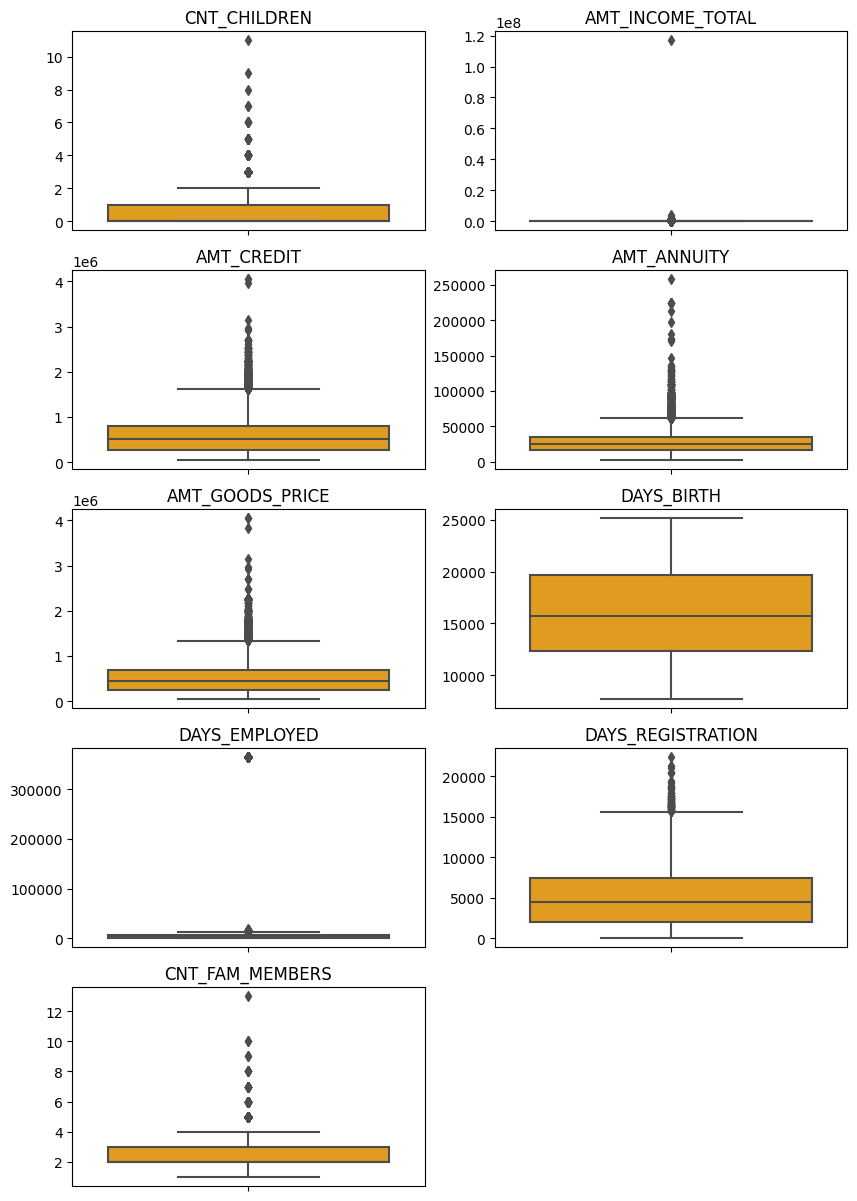

In [ ]:
plt.figure(figsize=[10,15])
for i,j in itertools.zip_longest(outlier_col, range(len(outlier_col))):
    plt.subplot(5,2,j+1)
    sns.boxplot(y = df_data_filter[i], orient = "h", color = "orange")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

In [ ]:
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS']

for col in categorical_columns:
    df_data_filter[col] = pd.Categorical(df_data_filter[col])

# Analyze Data Imbalance

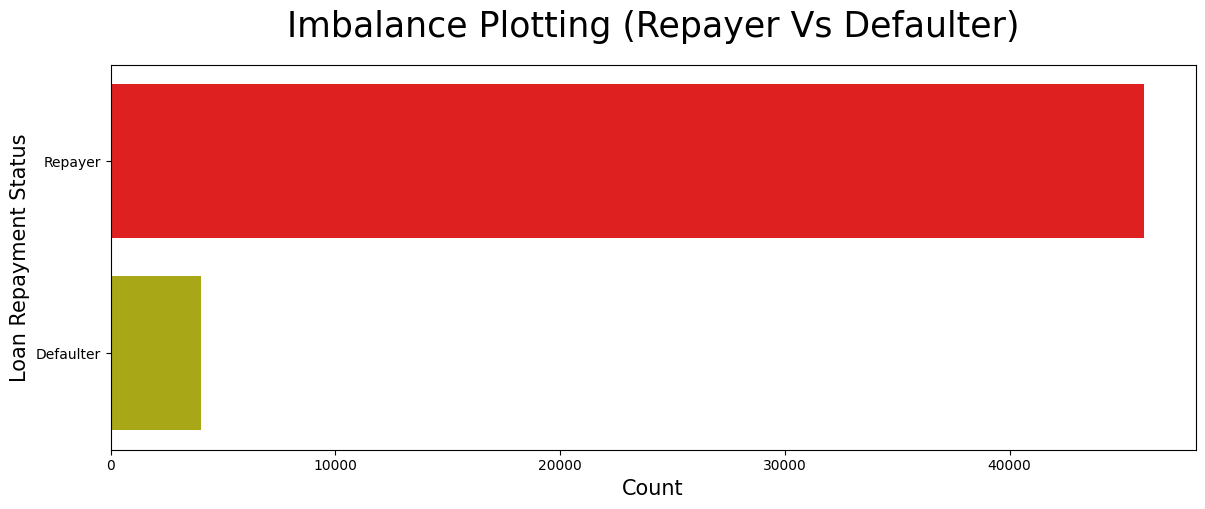

In [ ]:
plt.figure(figsize= [14,5])
sns.barplot(y=["Repayer","Defaulter"], x =  df_data_filter["TARGET"].value_counts(), palette = ["red","y"],orient="h")
plt.ylabel("Loan Repayment Status",fontdict = {"fontsize":15})
plt.xlabel("Count",fontdict = {"fontsize":15})
plt.title("Imbalance Plotting (Repayer Vs Defaulter)", fontdict = {"fontsize":25}, pad = 20)
plt.show()

In [ ]:
a= df_data_filter['TARGET'].value_counts()
print( "No. of reapyers are ",a[0])
print("No. of defaulters are ",a[1])

No. of reapyers are  45973
No. of defaulters are  4026


In [ ]:
#Ratio of imbalance percentage with respect to defaulter and repayer is given below
repayer = round((df_data_filter["TARGET"].value_counts()[0]/len(df_data_filter)* 100),2)
print("Repayer Percentage is {}%".format(repayer))
defaluter = round((df_data_filter["TARGET"].value_counts()[1]/len(df_data_filter)* 100),2)
print("Defaulter Percentage is {}%".format(defaluter))
print("Imbalance Ratio with respect to Repayer and Defaulter is given: {0:.2f}/1 (approx)".format(repayer/defaluter))

Repayer Percentage is 91.95%
Defaulter Percentage is 8.05%
Imbalance Ratio with respect to Repayer and Defaulter is given: 11.42/1 (approx)


In [ ]:

# Creating a function to find if the column is categorical or numerical

def data_type(dataset,col):
    if dataset[col].dtype == np.int64 or dataset[col].dtype == np.float64:
        return "numerical"
    if dataset[col].dtype == "category":
        return "categorical"

# Creating a function "univariate" to perform analysis one single variable with respect to target variable

def univariate(dataset,col,target_col,ylog=False,x_label_angle=False,h_layout=True):
    if data_type(dataset,col) == "numerical":
        sns.distplot(dataset[col],hist=False)


    elif data_type(dataset,col) == "categorical":
        val_count = dataset[col].value_counts()
        df1 = pd.DataFrame({col: val_count.index,'count': val_count.values})


        target_1_percentage = dataset[[col, target_col]].groupby([col],as_index=False).mean()
        target_1_percentage[target_col] = target_1_percentage[target_col]*100
        target_1_percentage.sort_values(by=target_col,inplace = True)


# If the plot is not readable, use the log scale

        if(h_layout):
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,7))
        else:
            fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(25,35))


# 1. Subplot 1: Count plot of the column

        s = sns.countplot(ax=ax1, x=col, data=dataset, hue=target_col)
        ax1.set_title(col, fontsize = 20)
        ax1.legend(['Repayer','Defaulter'])
        ax1.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})

        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)

# 2. Subplot 2: Percentage of defaulters within the column

        s = sns.barplot(ax=ax2, x = col, y=target_col, data=target_1_percentage)
        ax2.set_title("Defaulters % in "+col, fontsize = 20)
        ax2.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        ax2.set_ylabel(target_col,fontdict={'fontsize' : 15, 'fontweight' : 3})

        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)


# If the plot is not readable, use the log scale

        if ylog:
            ax1.set_yscale('log')
            ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 15, 'fontweight' : 3})
        else:
            ax1.set_ylabel("Count",fontdict={'fontsize' : 15, 'fontweight' : 3})


        plt.show()


In [ ]:
# function for plotting repetitive rel plots in bivaritae numerical analysis

def bivariate_n(x,y,df,hue,kind,labels):
    plt.figure(figsize=[10,10])
    sns.relplot(x=x, y=y, data=df, hue=hue,kind=kind,legend = False)
    plt.legend(labels=labels)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# function for plotting repetitive barplots in bivariate categorical analysis

def bivariate_c(x,y,df,hue,figsize,labels):

    plt.figure(figsize=figsize)
    sns.barplot(x=x,y=y,data=df, hue=hue)

    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontsize = 15)
    plt.ylabel(y,fontsize = 15)
    plt.title(x+" & "+y+" BIVARAITE ANALYSIS" ,fontsize = 20)
    plt.xticks(rotation=45, ha='right')
    plt.legend(labels = labels )
    plt.show()

In [ ]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_c_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, data=df,hue= hue,palette= palette,order=df[col].value_counts().index)


    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontsize=15)
    else:
        plt.ylabel("Count",fontsize=15)

    plt.title(col , fontsize=20)
    plt.legend(loc = "upper right")
    plt.xticks(rotation=45, ha='right')

    plt.show()

In [ ]:
# Function to plot point plots

def pointplot(df,hue,x,y):
    plt.figure(figsize=(10,4))
    sns.pointplot(x=x, y=y, hue=hue, data=df)
    plt.title(x+" VS "+y,fontsize = 15)

In [ ]:
# storing numnercial and categorical columns as list in belows varibles

cat_col = list(df_data_filter.select_dtypes(["category"]).columns)   # Categorical columns list
num_col = list(df_data_filter.select_dtypes(["int","float"]).columns)  #N Numerical Column list

# **CATEGORICAL SEGMENTED UNIVARAITE ANALYSIS**

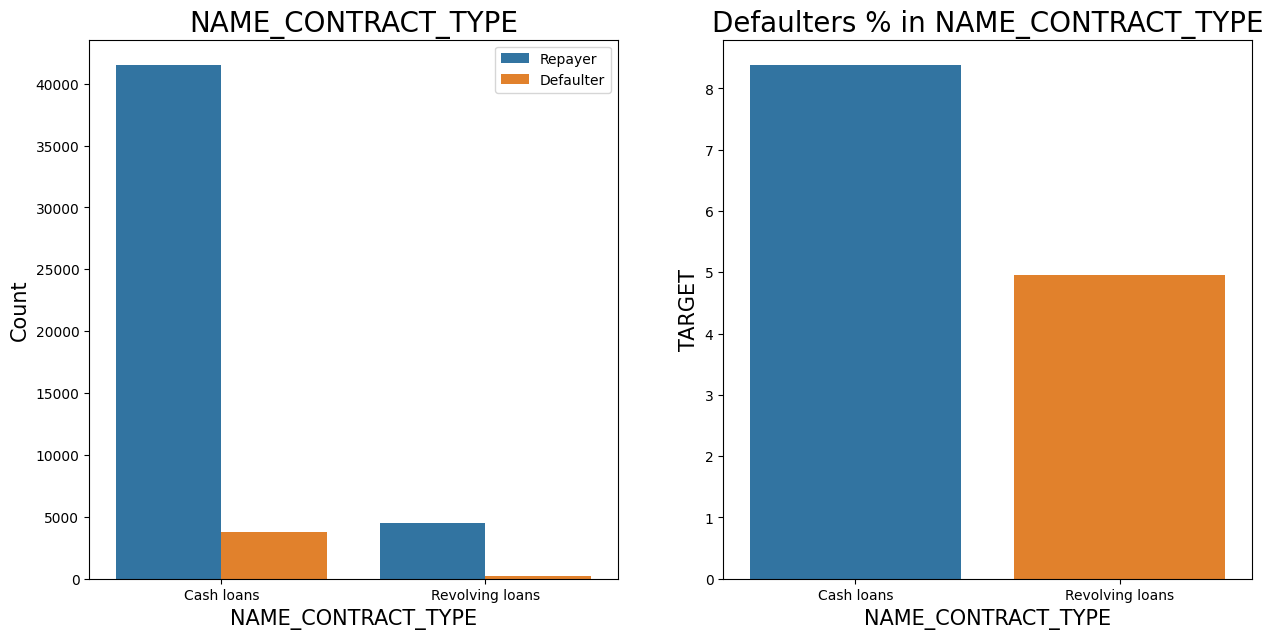

In [ ]:
univariate(df_data_filter,"NAME_CONTRACT_TYPE","TARGET",False,False,True)

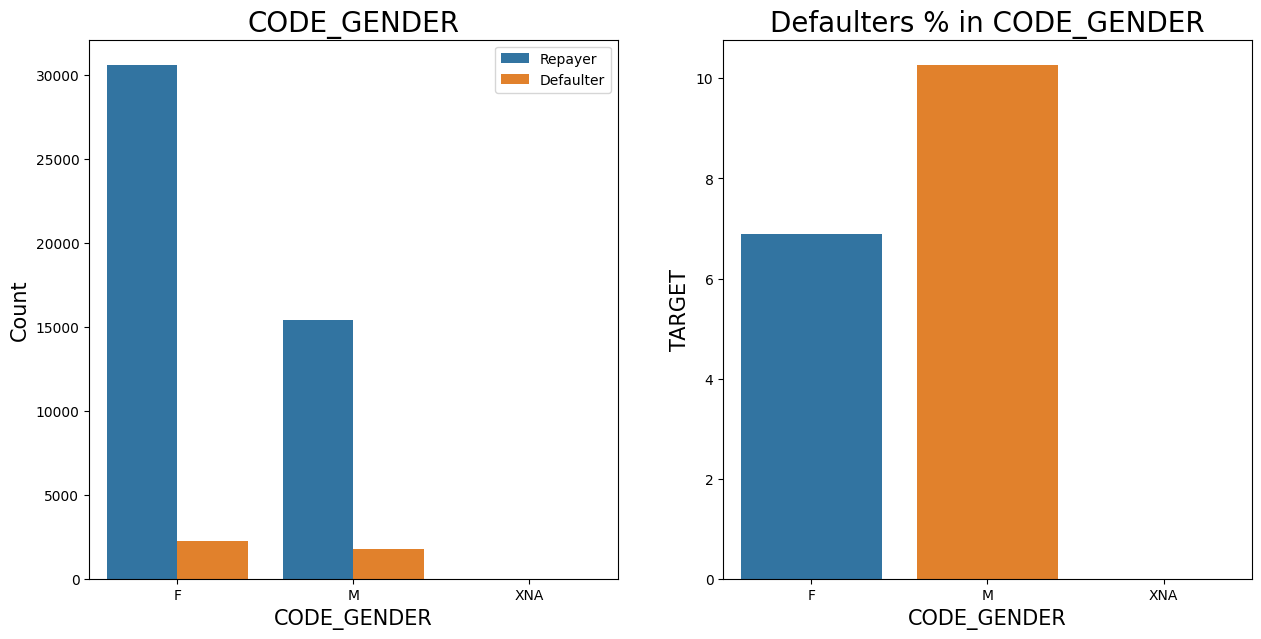

In [ ]:
#2 Checking the type of Gender on loan repayment status
univariate(df_data_filter,"CODE_GENDER","TARGET",False,False,True)


In [ ]:
df_data_filter.loc[:,['CODE_GENDER',"TARGET"]].value_counts()

CODE_GENDER  TARGET
F            0         30559
M            0         15412
F            1          2264
M            1          1762
XNA          0             2
dtype: int64

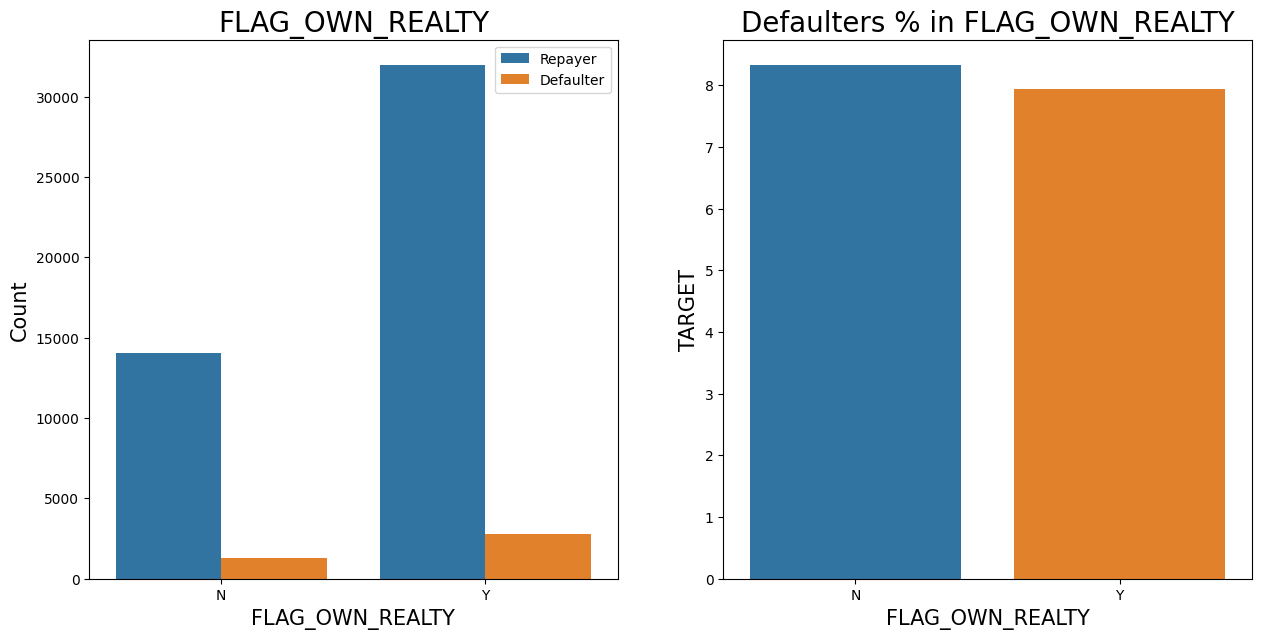

In [ ]:
#3 Checking if owning a real estate is related to loan repayment status
univariate(df_data_filter,"FLAG_OWN_REALTY","TARGET",False,False,True)

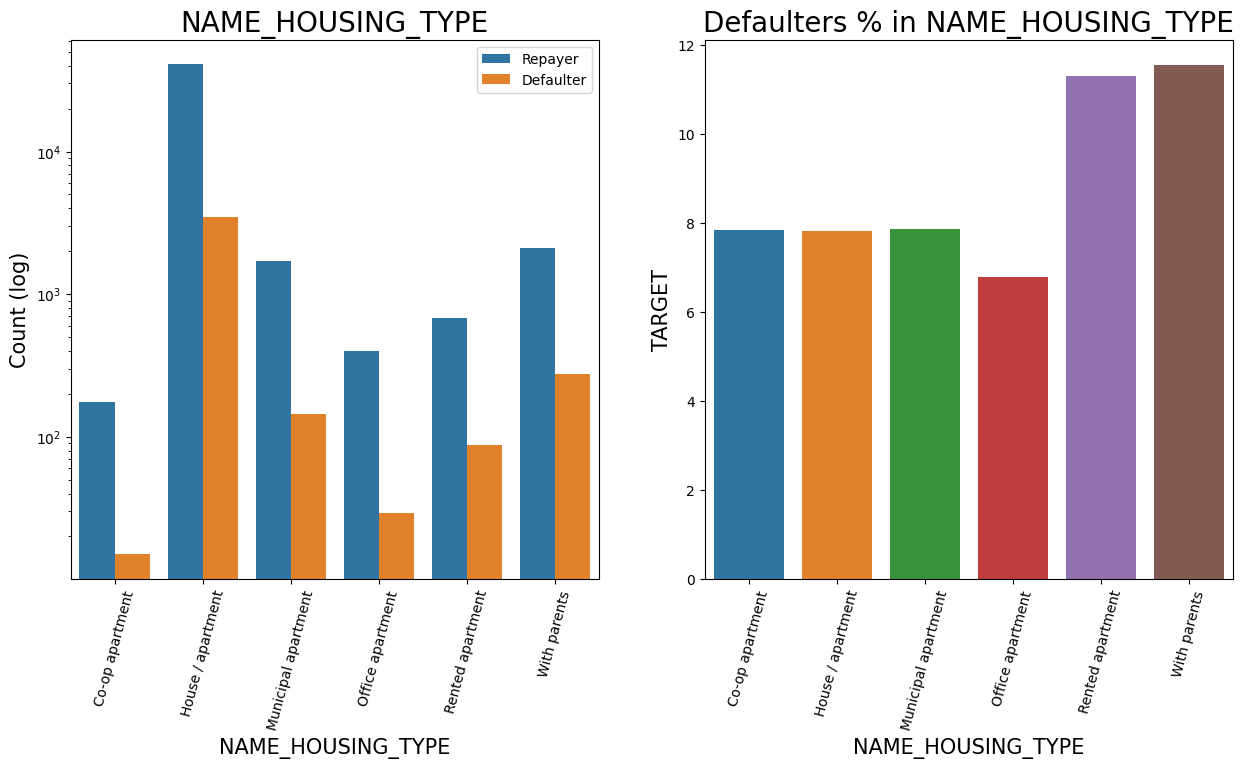

In [ ]:
#4 Analyzing Housing Type based on loan repayment status
univariate(df_data_filter,"NAME_HOUSING_TYPE","TARGET",True,True,True)

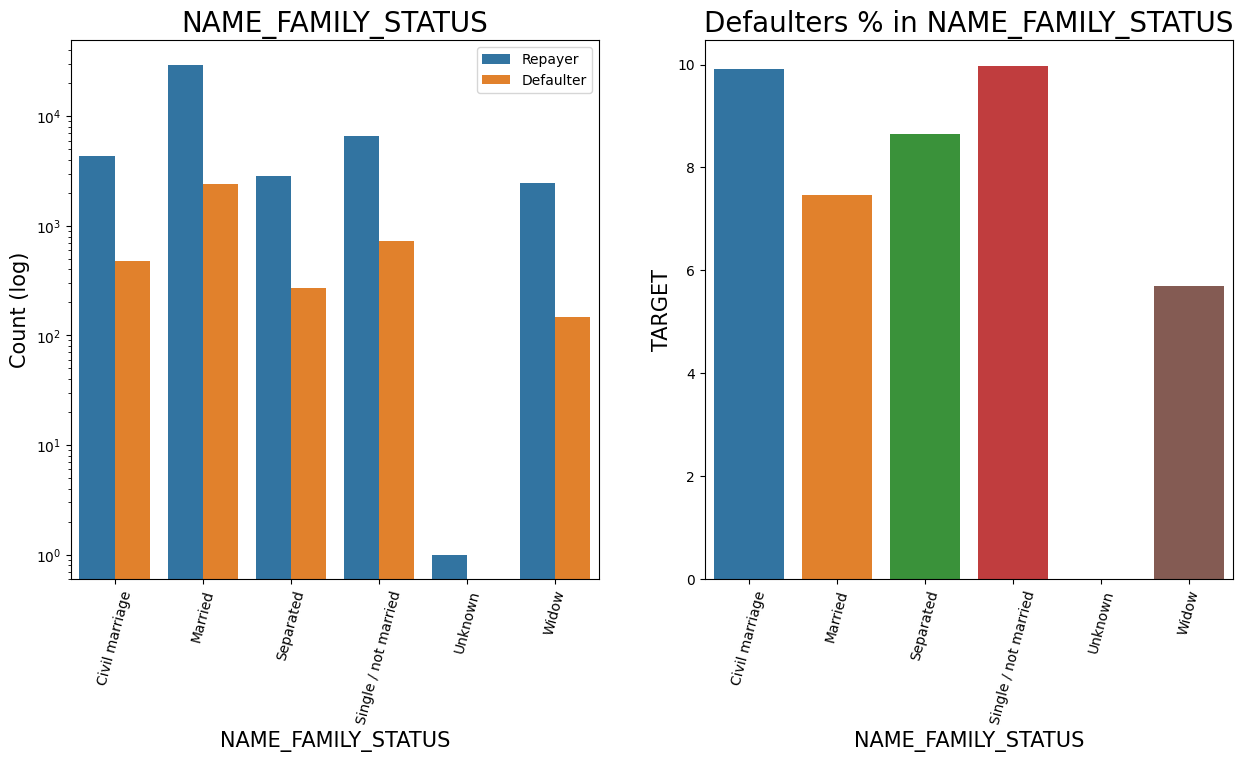

In [ ]:
#5 Analyzing Family status based on loan repayment status
univariate(df_data_filter,"NAME_FAMILY_STATUS","TARGET",True,True,True)

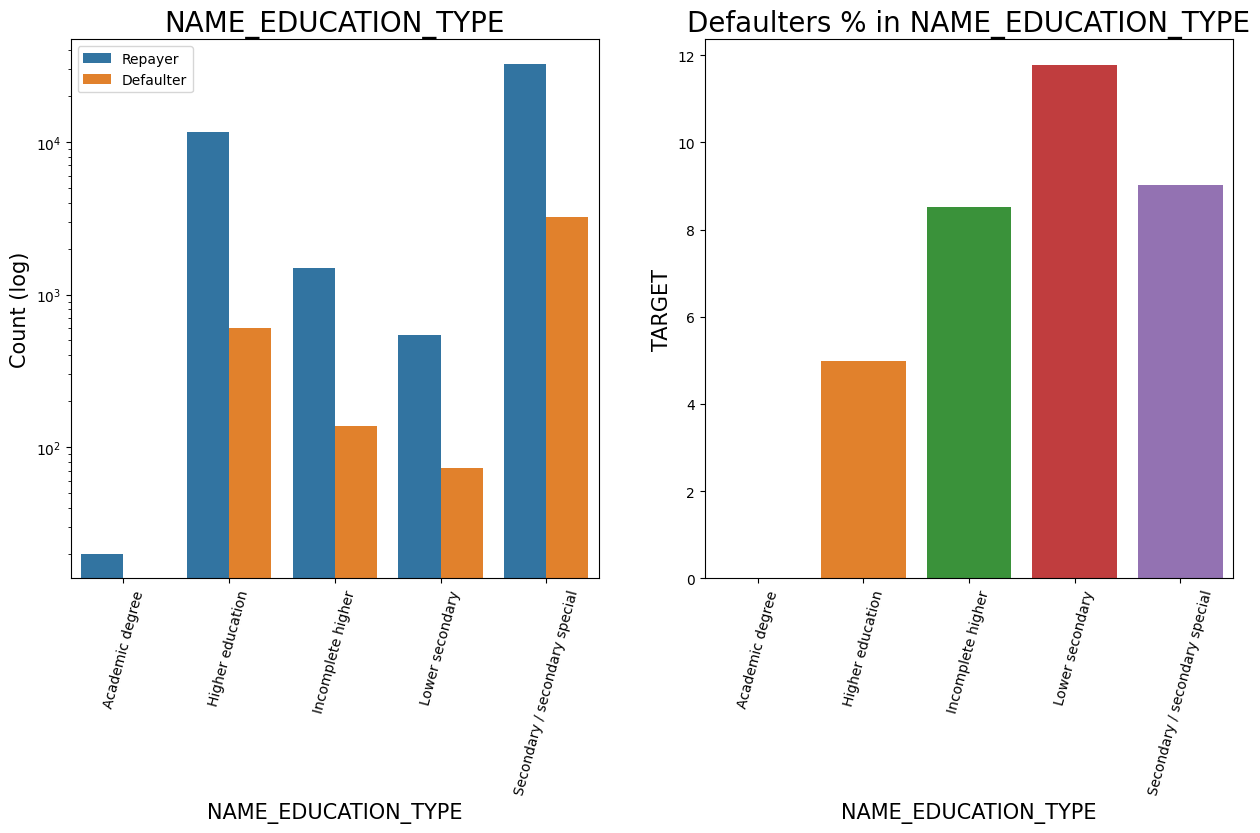

In [ ]:
#6 Analyzing Education Type based on loan repayment status
univariate(df_data_filter,"NAME_EDUCATION_TYPE","TARGET",True,True,True)

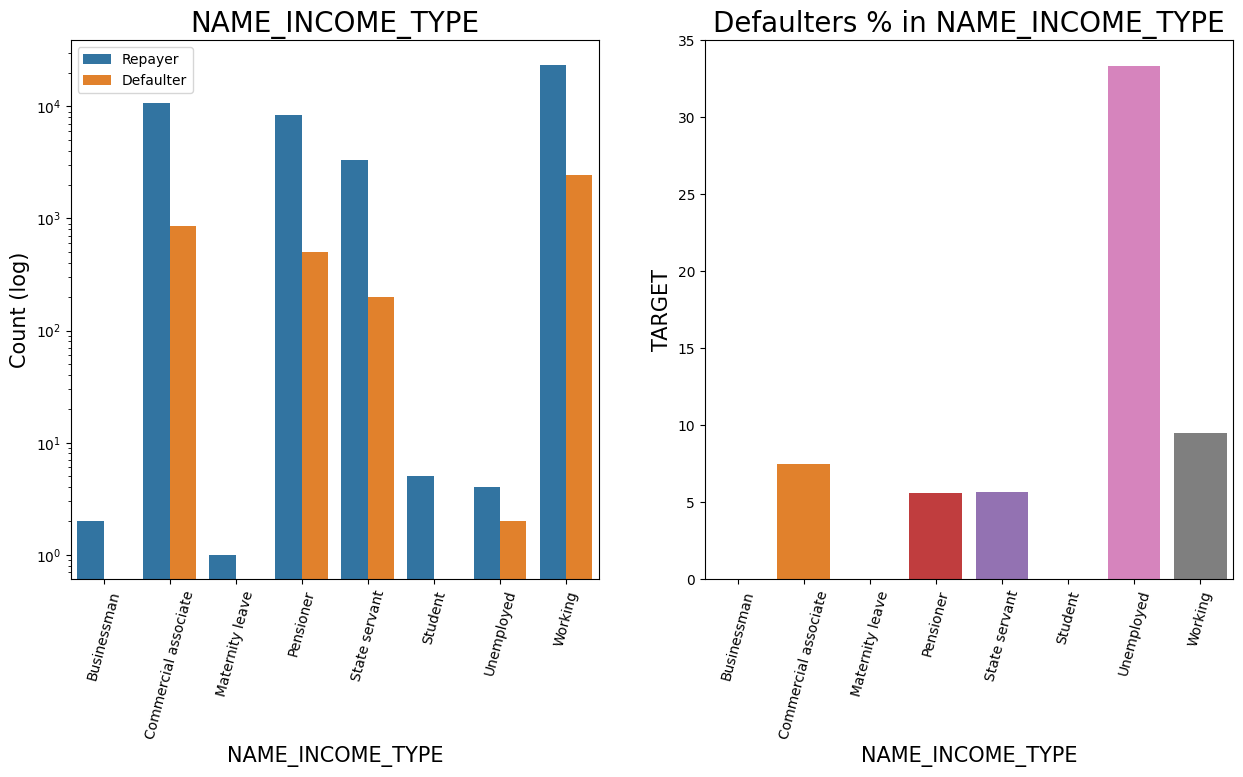

In [ ]:
#7 Analyzing Income Type based on loan repayment status
univariate(df_data_filter,"NAME_INCOME_TYPE","TARGET",True,True,True)

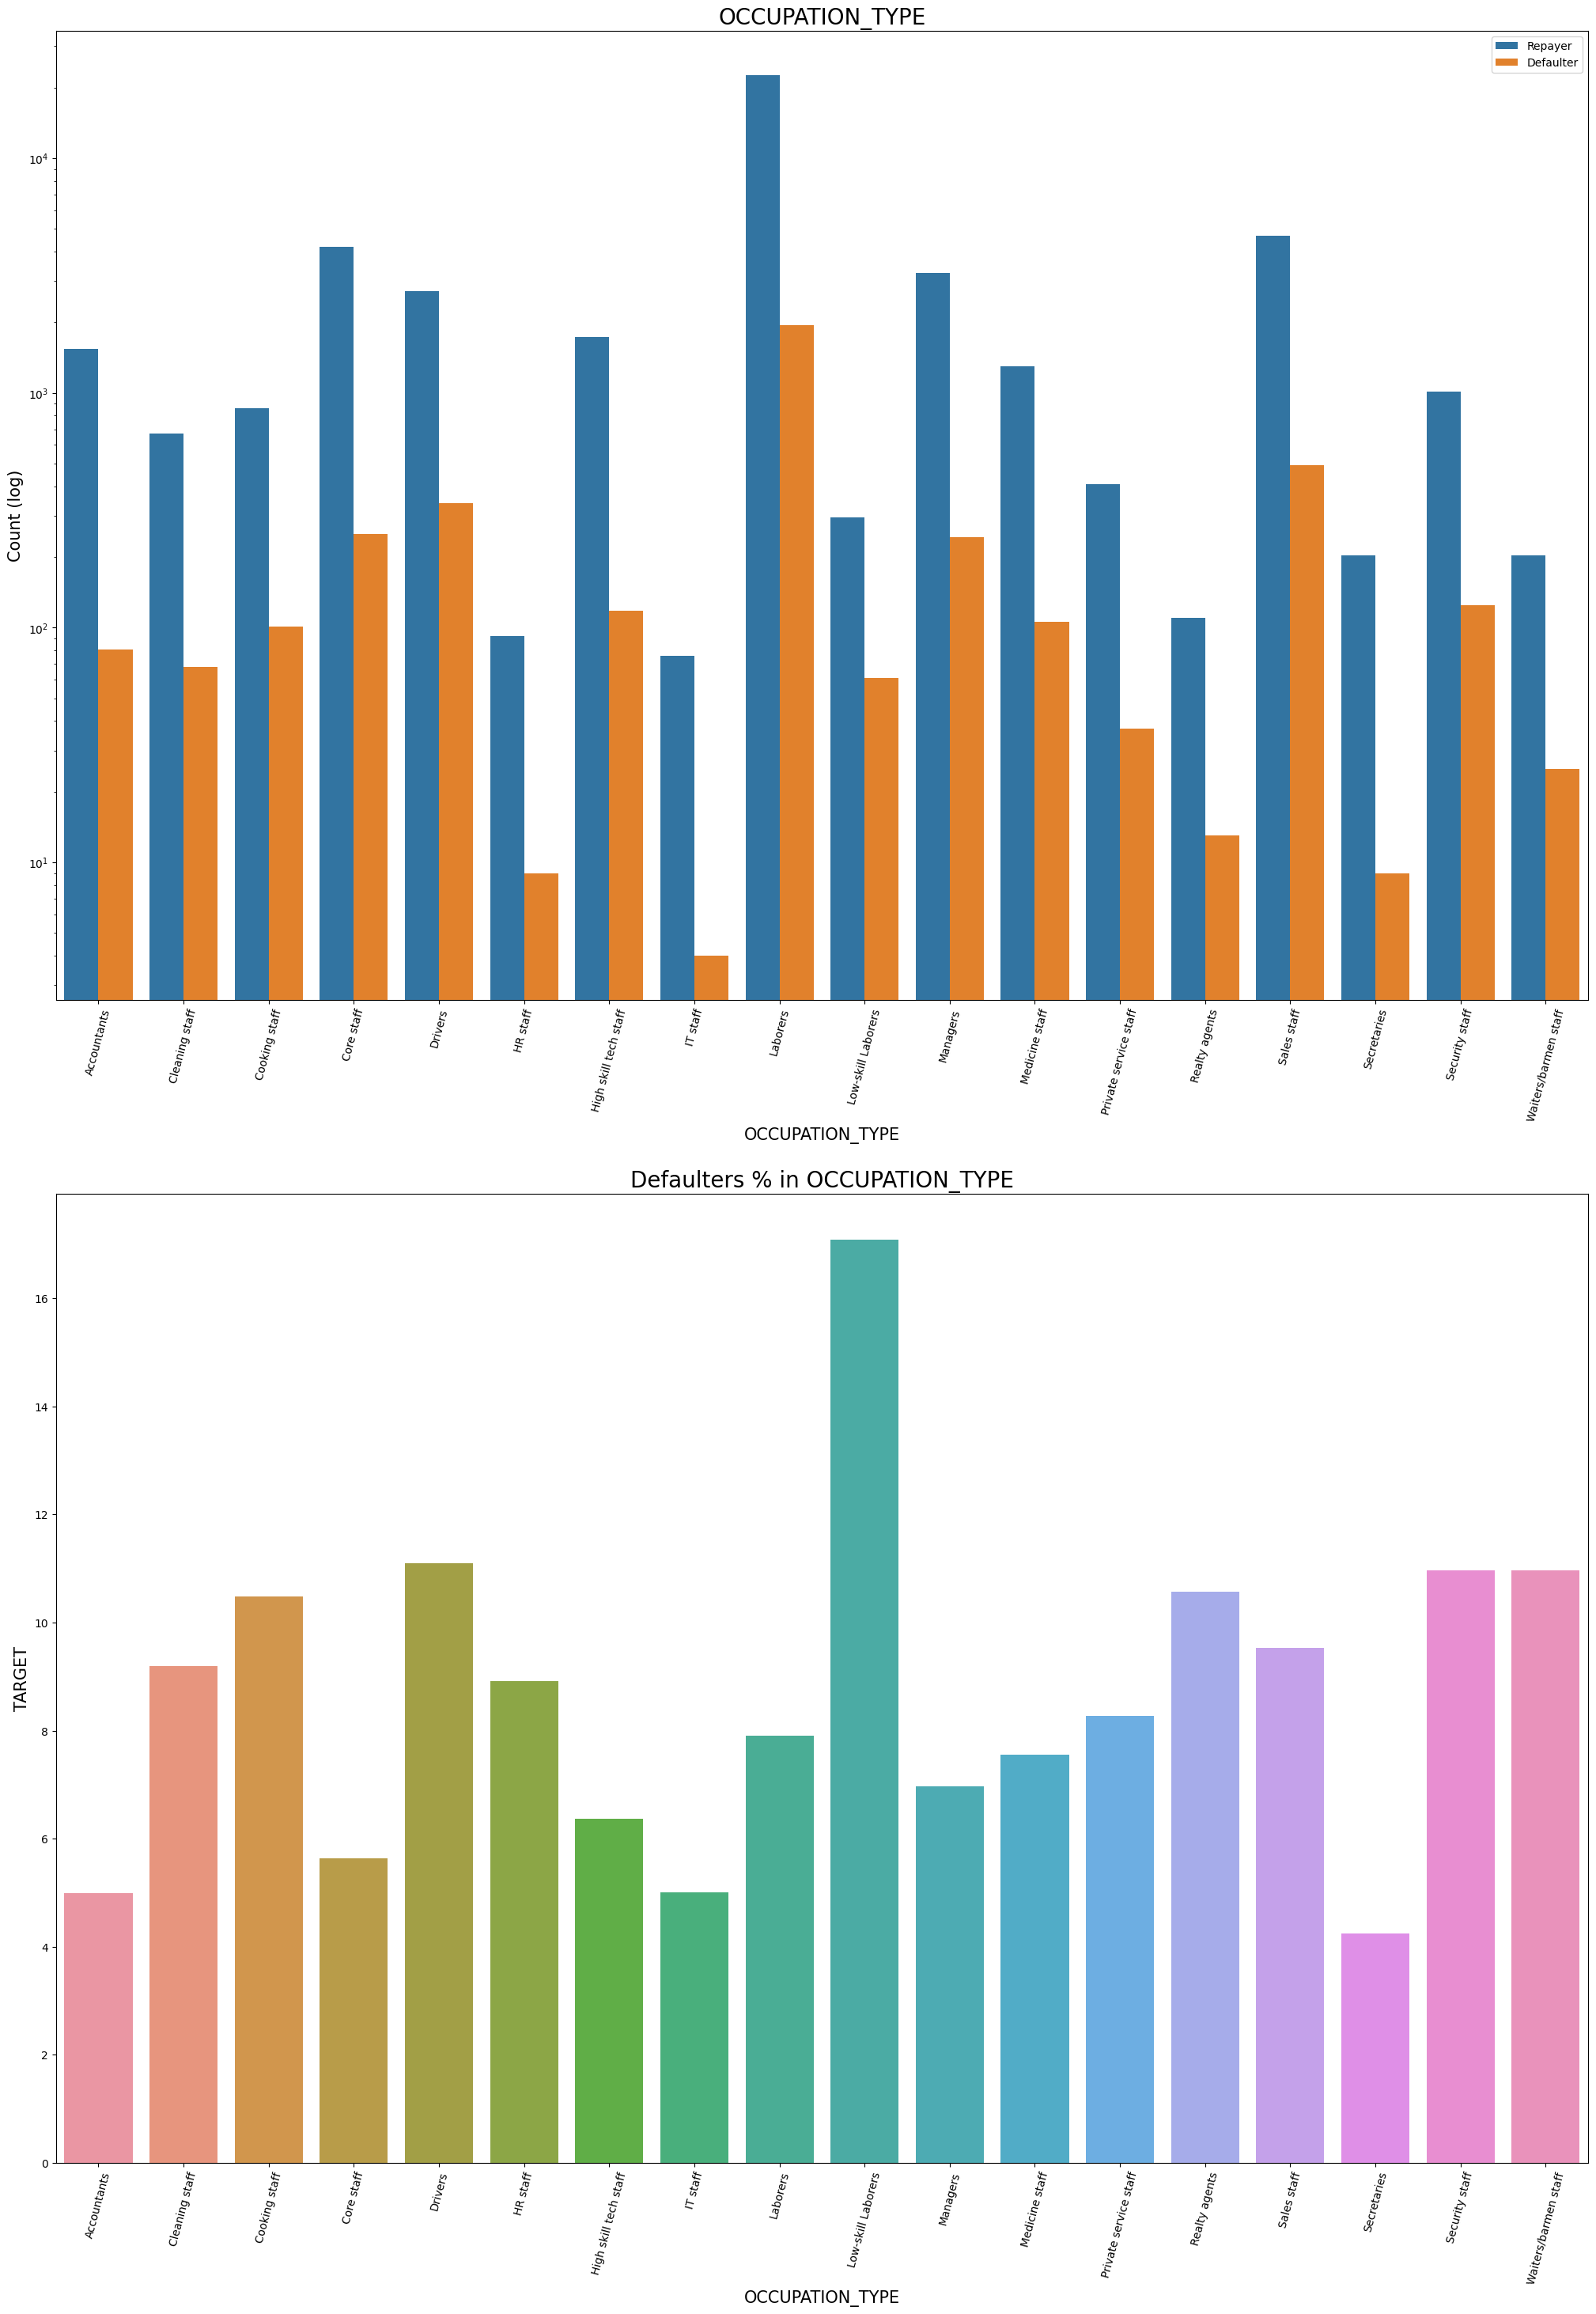

In [ ]:
#8 Analyzing Occupation Type where applicant lives based on loan repayment status
univariate(df_data_filter,"OCCUPATION_TYPE","TARGET",True,True,False)

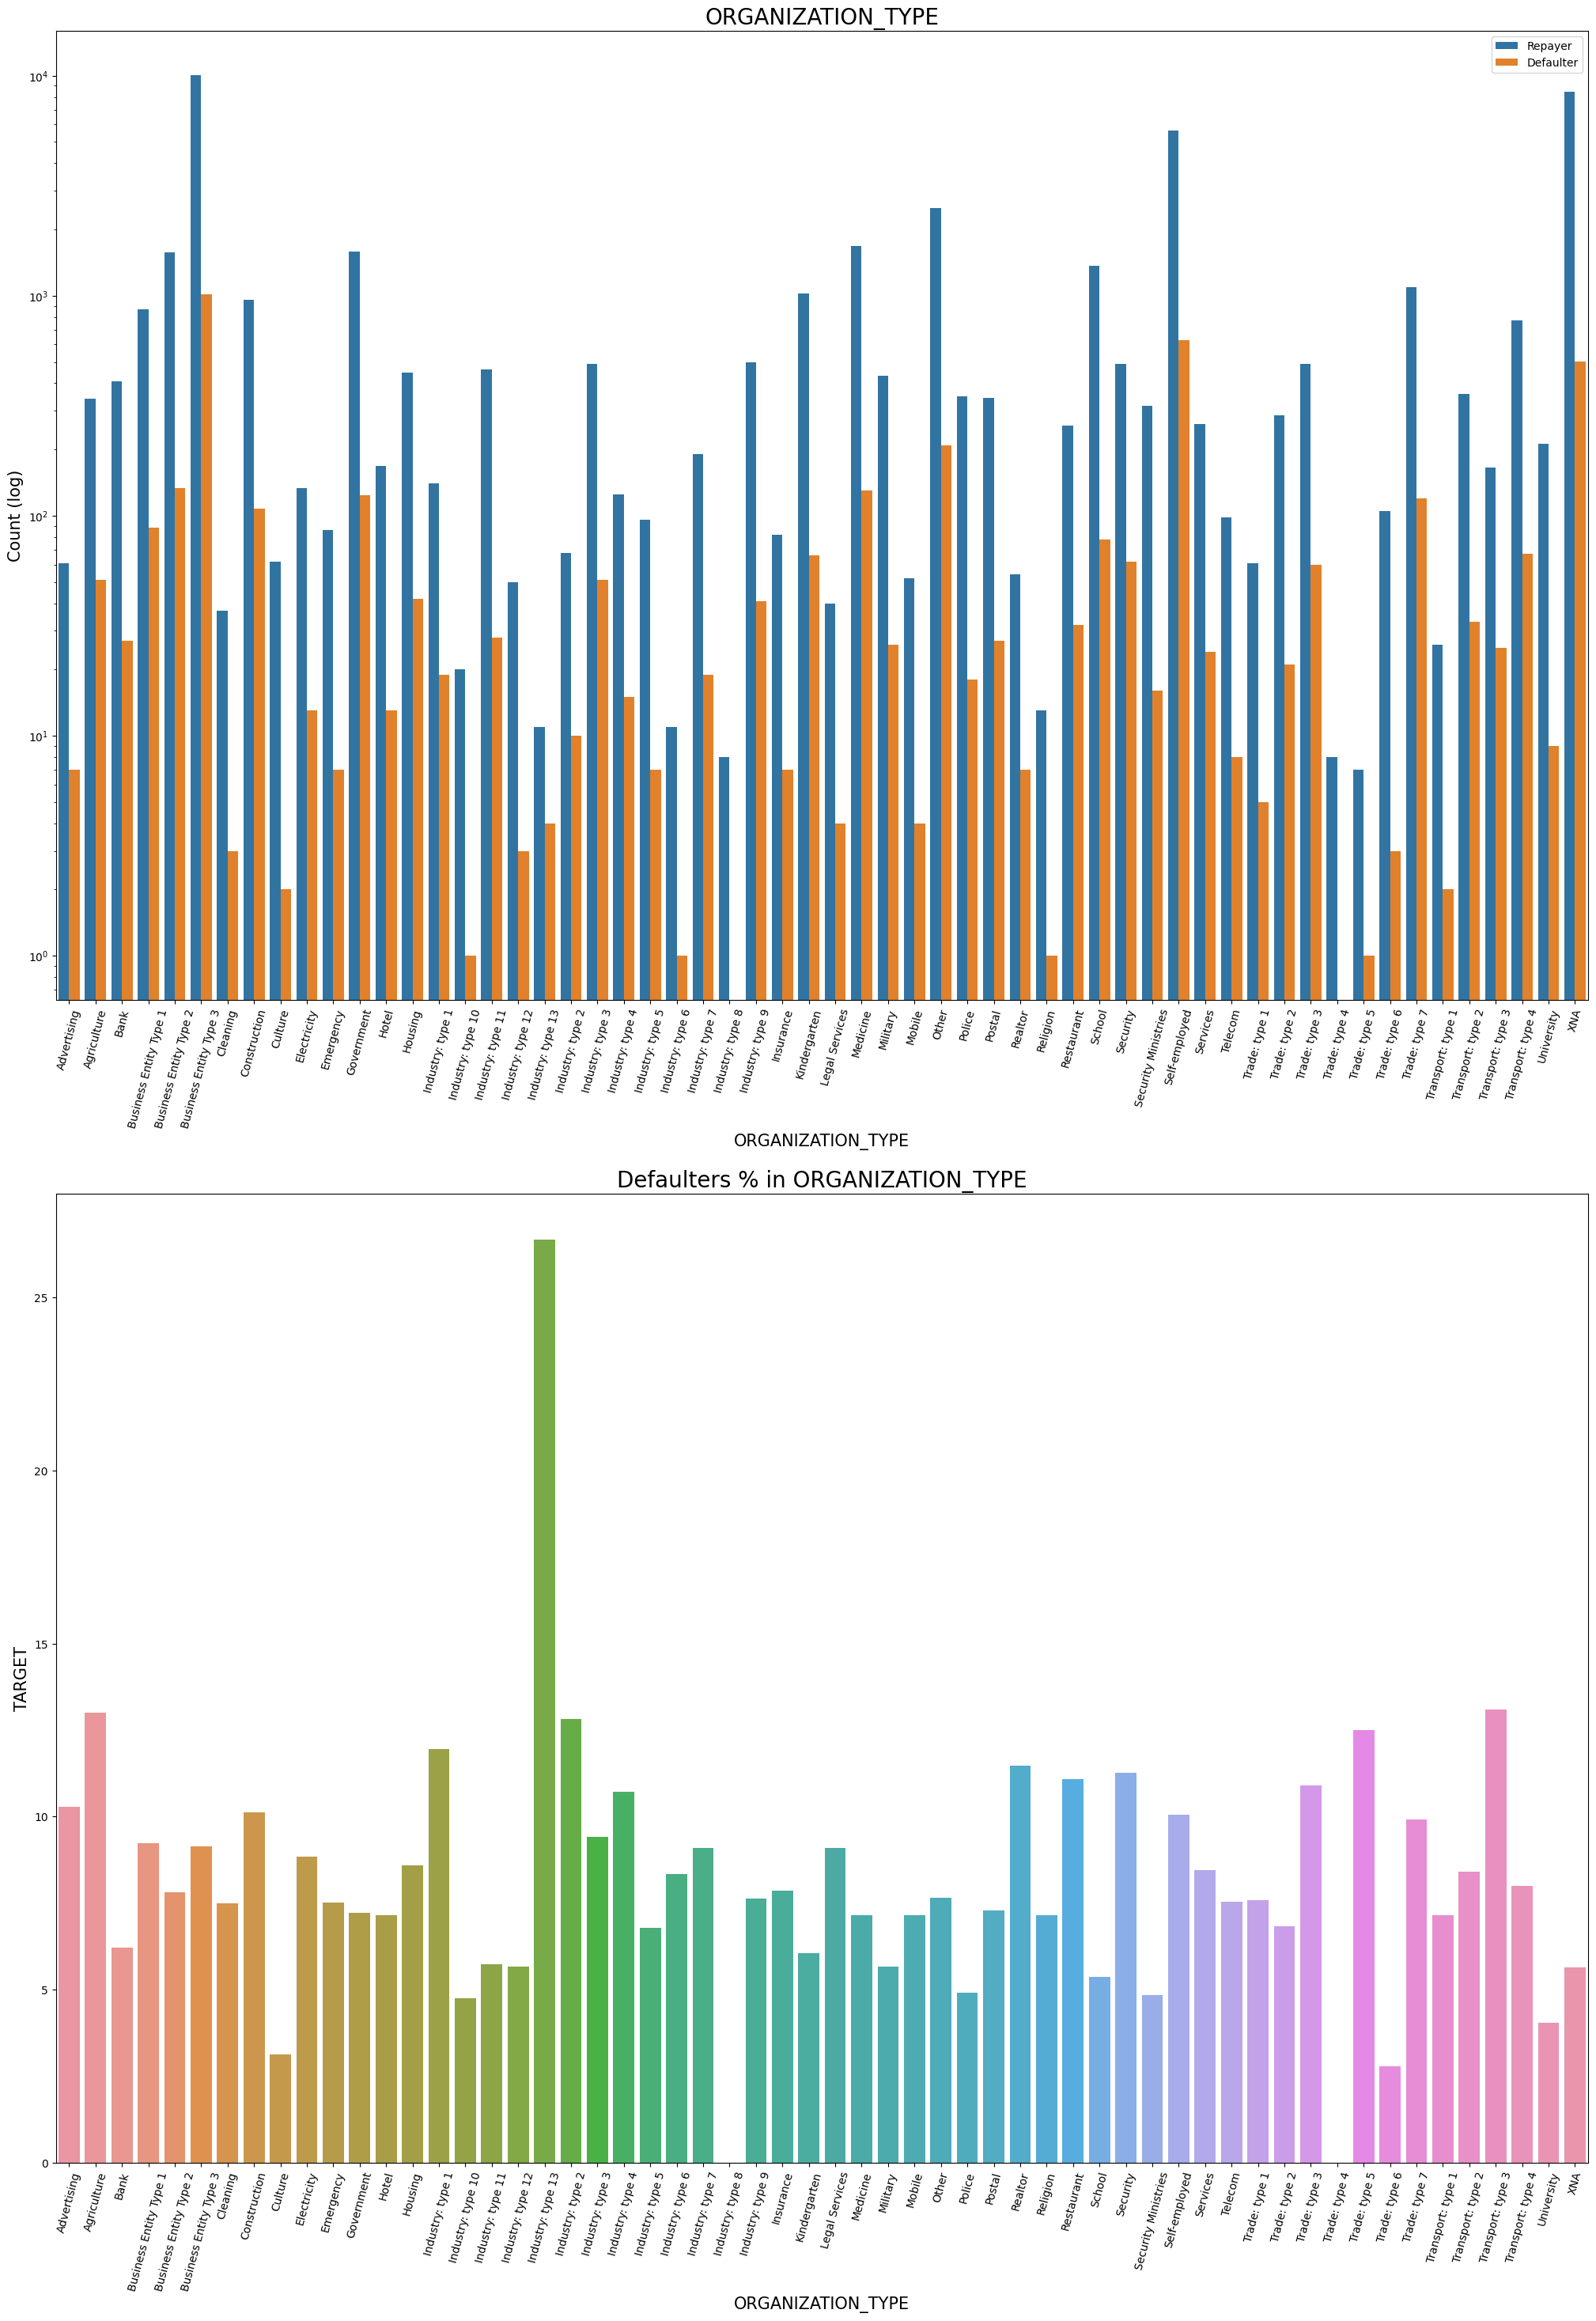

In [ ]:
#9 Checking Loan repayment status based on Organization type

univariate(df_data_filter,"ORGANIZATION_TYPE","TARGET",True,True,False)

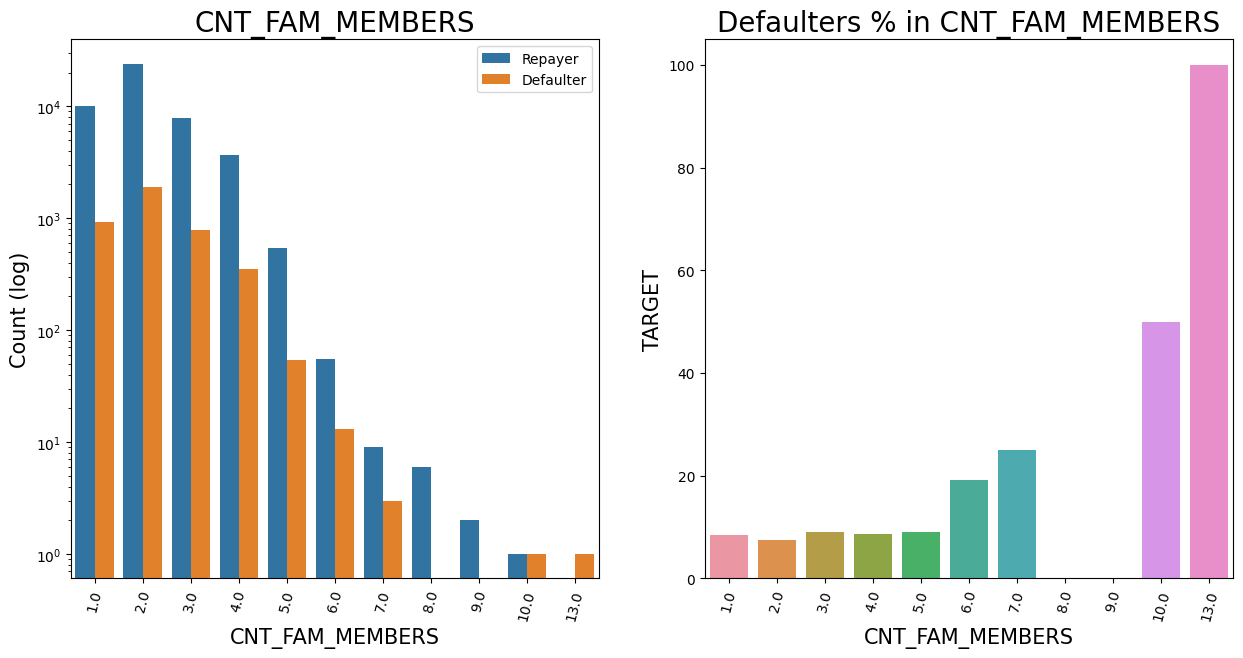

In [ ]:
#10 Analyzing Number of family members based on loan repayment status
univariate(df_data_filter,"CNT_FAM_MEMBERS","TARGET",True,True,True)

In [ ]:
#MULTI/BI VARAITE ANALYSIS
df_data_filter.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,2.0,1.575000e+06,954594.154602,900000.0,1237500.0,1575000.0,1912500.0,2250000.0
Commercial associate,11543.0,2.034388e+05,127060.095861,36000.0,135000.0,180000.0,225000.0,3825000.0
Maternity leave,1.0,3.600000e+05,NaN,360000.0,360000.0,360000.0,360000.0,360000.0
Pensioner,8920.0,1.347265e+05,75980.259871,25650.0,85500.0,112500.0,162000.0,1935000.0
State servant,3512.0,1.784169e+05,89711.373949,27000.0,112500.0,157500.0,225000.0,900000.0
Student,5.0,1.548000e+05,50672.477737,90000.0,135000.0,144000.0,180000.0,225000.0
Unemployed,6.0,1.548750e+05,122532.419180,31500.0,66937.5,117000.0,236250.0,337500.0
Working,26010.0,1.674871e+05,729614.365031,25650.0,112500.0,135000.0,202500.0,117000000.0


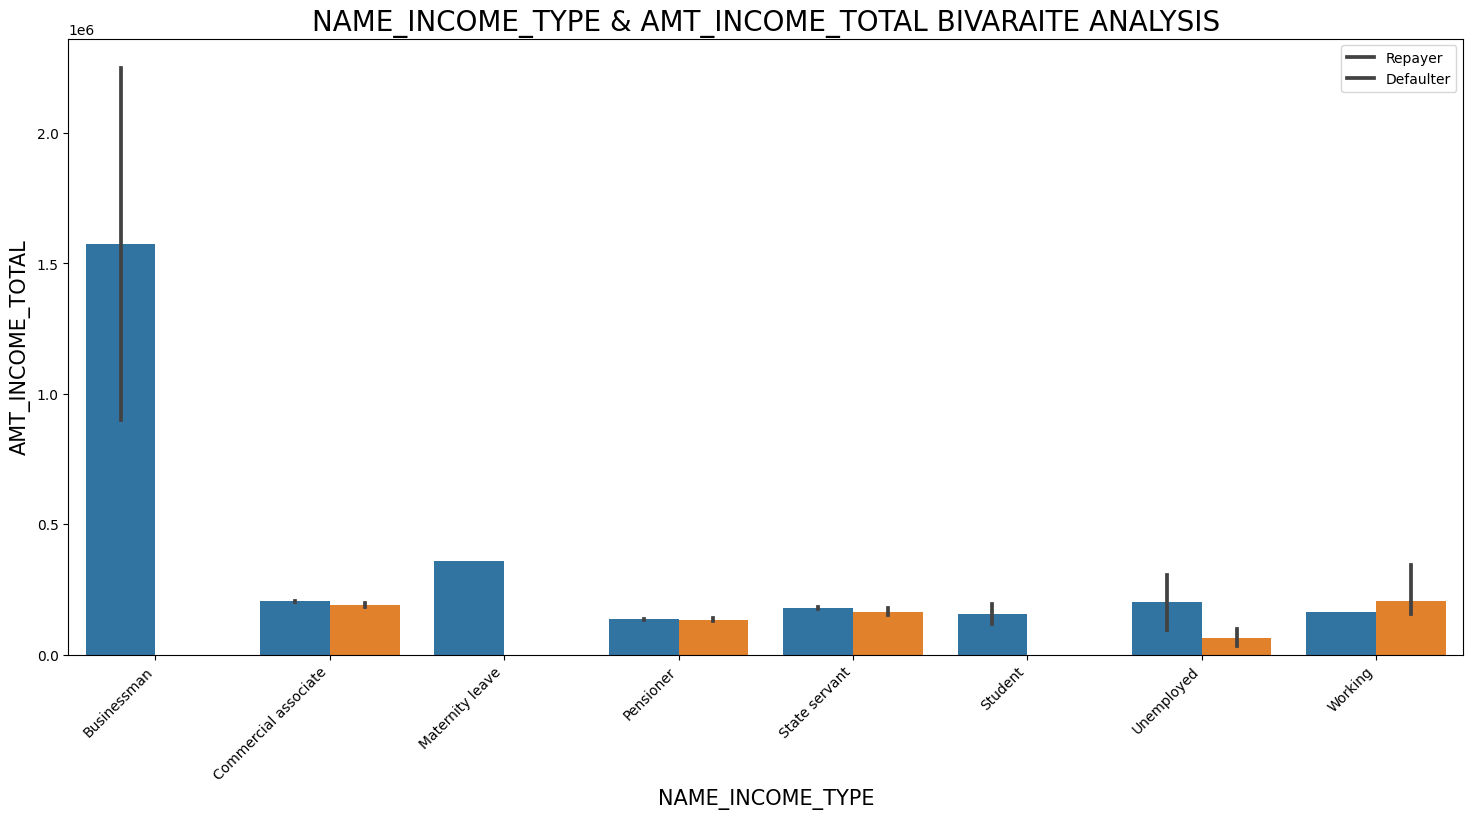

In [ ]:
# Income type vs Income Amount Range on a Seaborn Barplot
bivariate_c("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",df_data_filter,"TARGET",(18,8),['Repayer','Defaulter'])

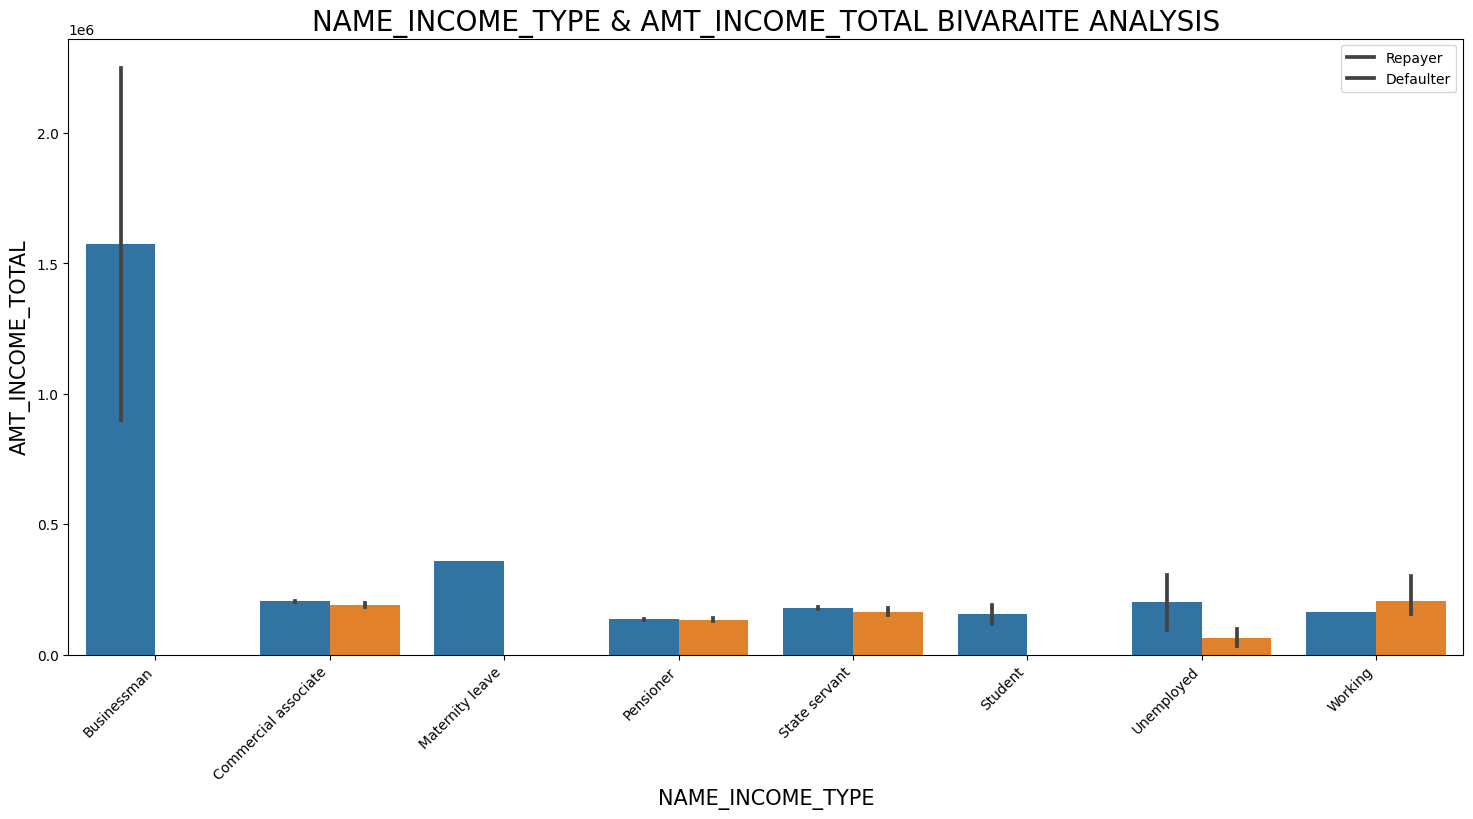

In [ ]:
# Income type vs Income Amount Range on a Seaborn Barplot
bivariate_c("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",df_data_filter,"TARGET",(18,8),['Repayer','Defaulter'])

In [ ]:
# bisecting the app_data dataframe based on Target value 0 and 1 for correlation and other analysis

cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


# Repayers dataframe
Repayer_df = df_data_filter.loc[df_data_filter['TARGET']==0, cols_for_correlation]

# Defaulters dataframe
Defaulter_df = df_data_filter.loc[df_data_filter['TARGET']==1, cols_for_correlation]

<ipython-input-205-6d48100e99ce>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Defaulter_df[i[1]], hist=False,label ="Defaulter")
<ipython-input-205-6d48100e99ce>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Repayer_df[i[1]], hist=False, label ="Repayer")
<ipython-input-

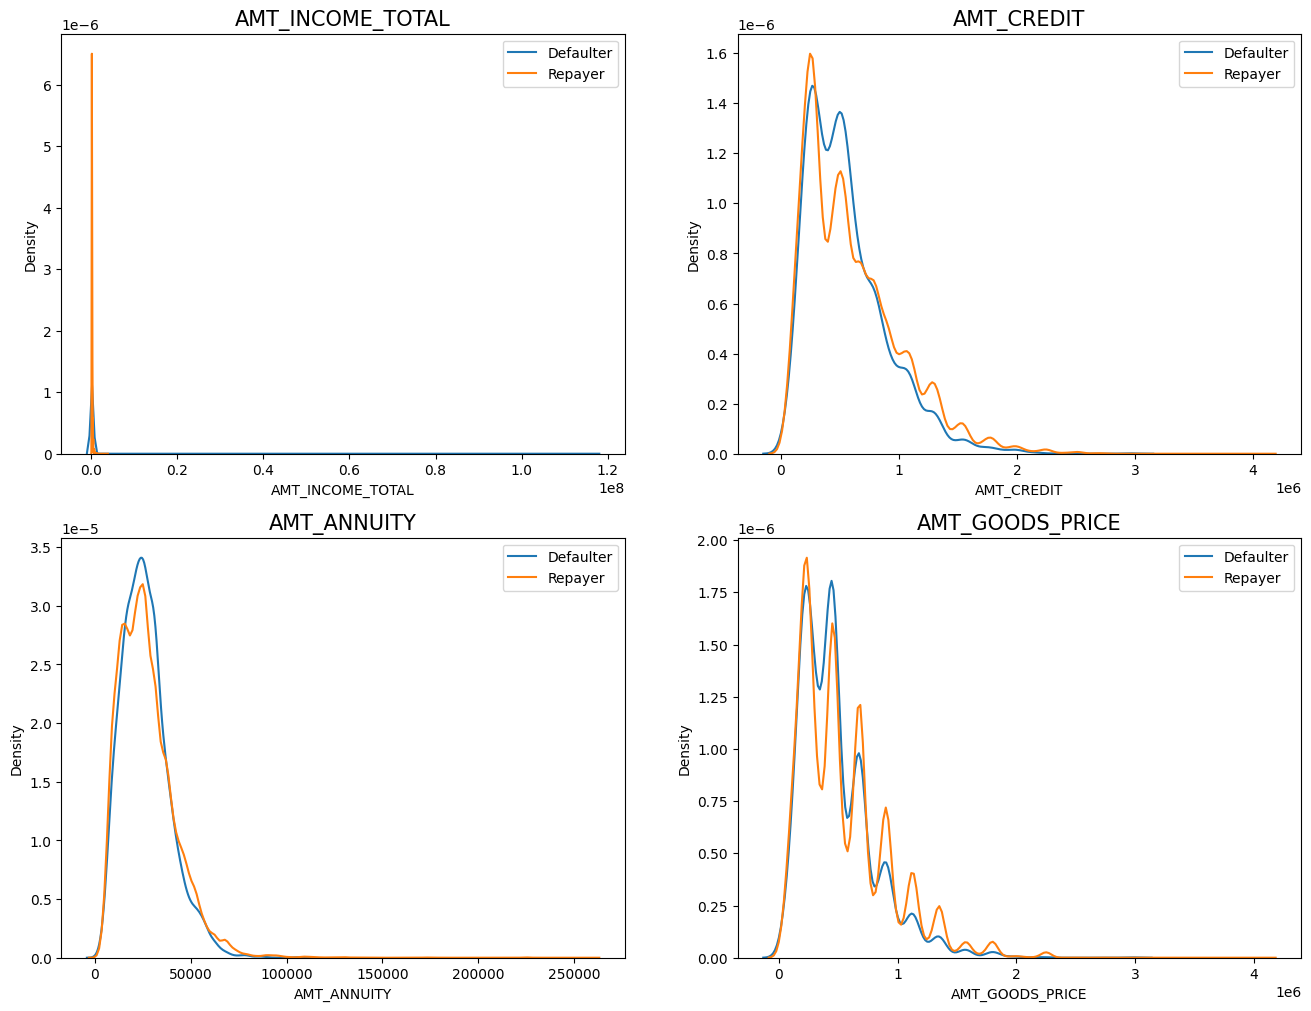

In [ ]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = df_data_filter[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False,label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5})
    plt.legend()


plt.show()

<Figure size 1000x1000 with 0 Axes>

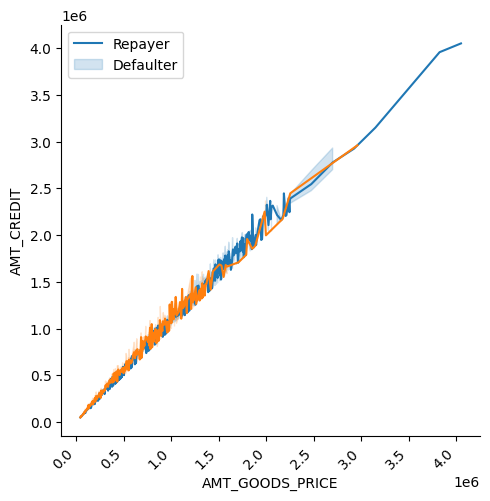

In [ ]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_n('AMT_GOODS_PRICE','AMT_CREDIT',df_data_filter,"TARGET", "line",['Repayer','Defaulter'])

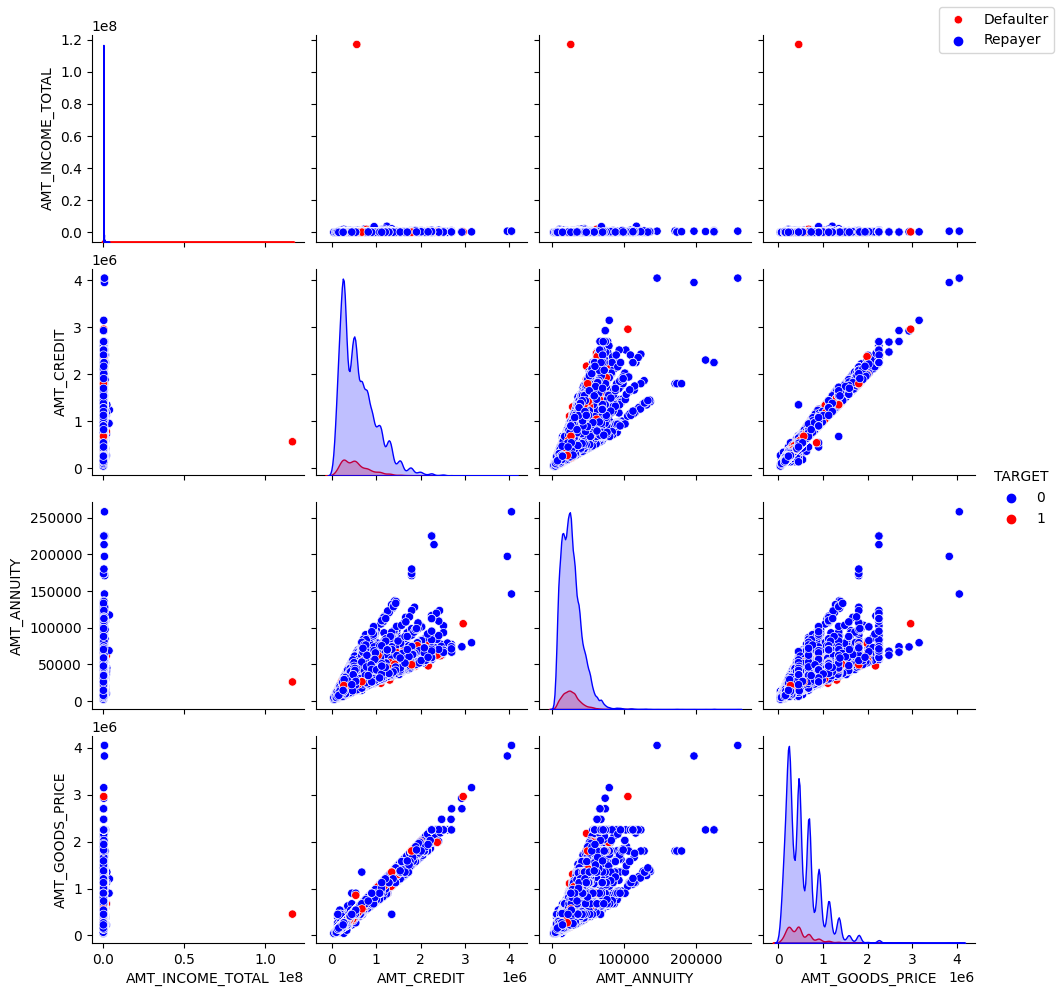

In [ ]:
# Plotting pairplot between amount variable to draw reference against loan repayment status

amount = df_data_filter[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
#amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]

ax= sns.pairplot(amount,hue="TARGET",palette=["b","r"])
ax.fig.legend(labels=['Defaulter','Repayer'])
plt.show()

In [ ]:
# merge both the dataframe on SK_ID_CURR with Inner Joins
loan_df = pd.merge(df_data_filter, pre_df_data_filtered, how='inner', on='SK_ID_CURR')
loan_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Repeater,XNA,Cash,walk-in,Regional / Local,1200,Consumer electronics,18.0,high,Cash Street: high
1,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,Repeater,Consumer Electronics,POS,XNA,Regional / Local,164,Consumer electronics,12.0,low_action,POS household without interest
2,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,New,Audio/Video,POS,XNA,Country-wide,42,Connectivity,12.0,high,POS mobile with interest
3,100026,0,Cash loans,F,N,N,1,450000.0,497520.0,32521.5,...,New,Computers,POS,XNA,Country-wide,200,Consumer electronics,6.0,low_normal,POS household without interest
4,100027,0,Cash loans,F,N,Y,0,83250.0,239850.0,23850.0,...,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),5,XNA,12.0,low_normal,Cash X-Sell: low


In [ ]:
# Bisecting the "loan_df" dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_df[loan_df['TARGET']==0] # Repayers
L1 = loan_df[loan_df['TARGET']==1] # Defaulters

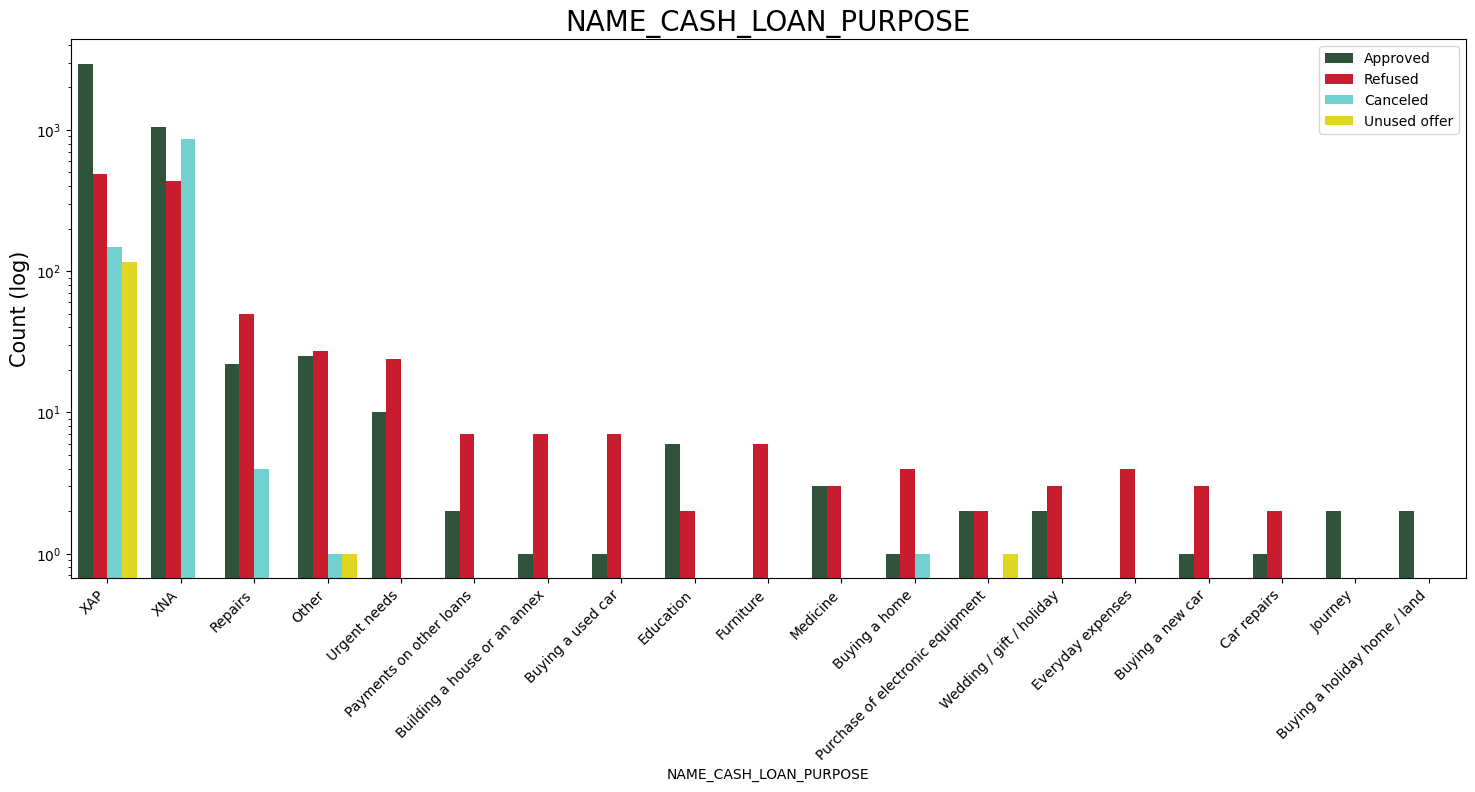

In [ ]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

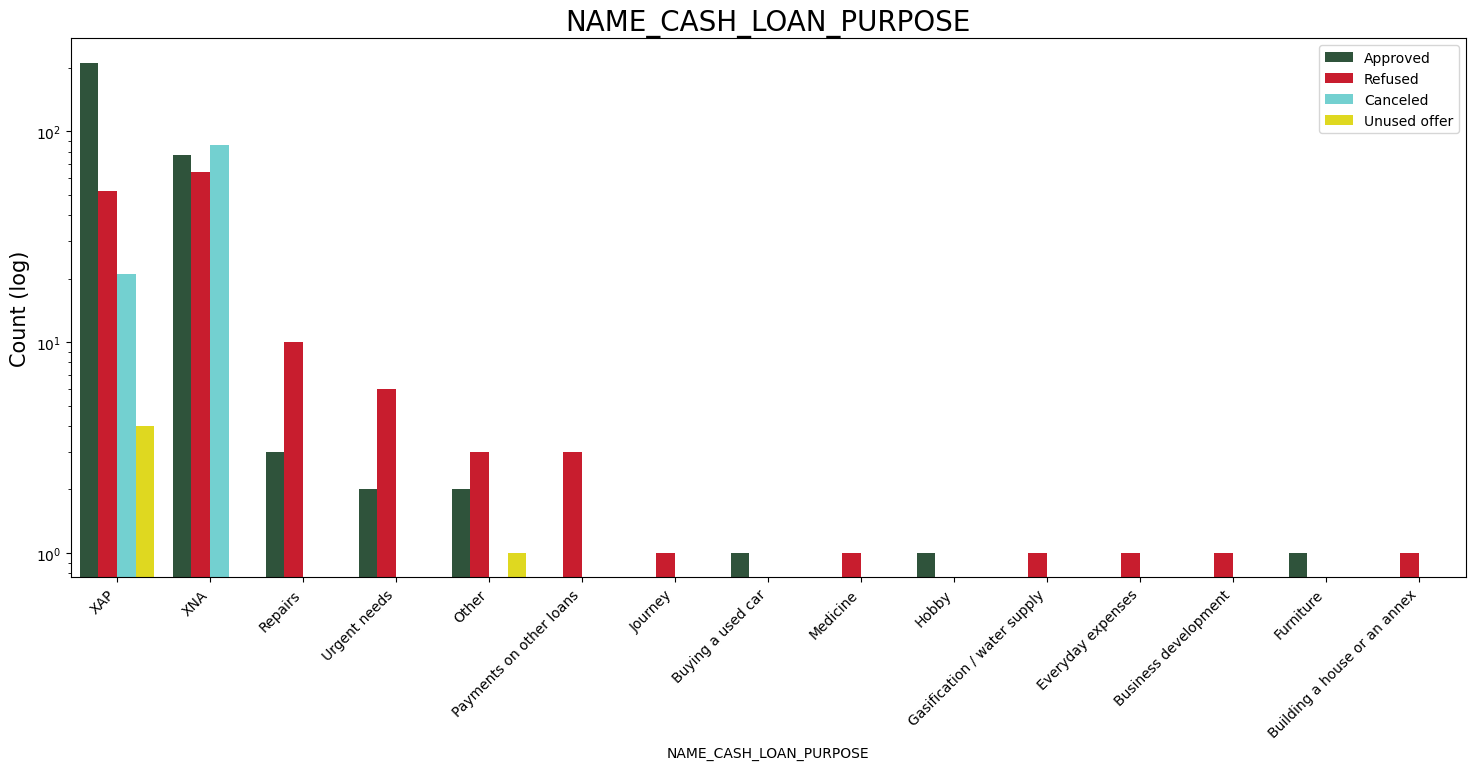

In [ ]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

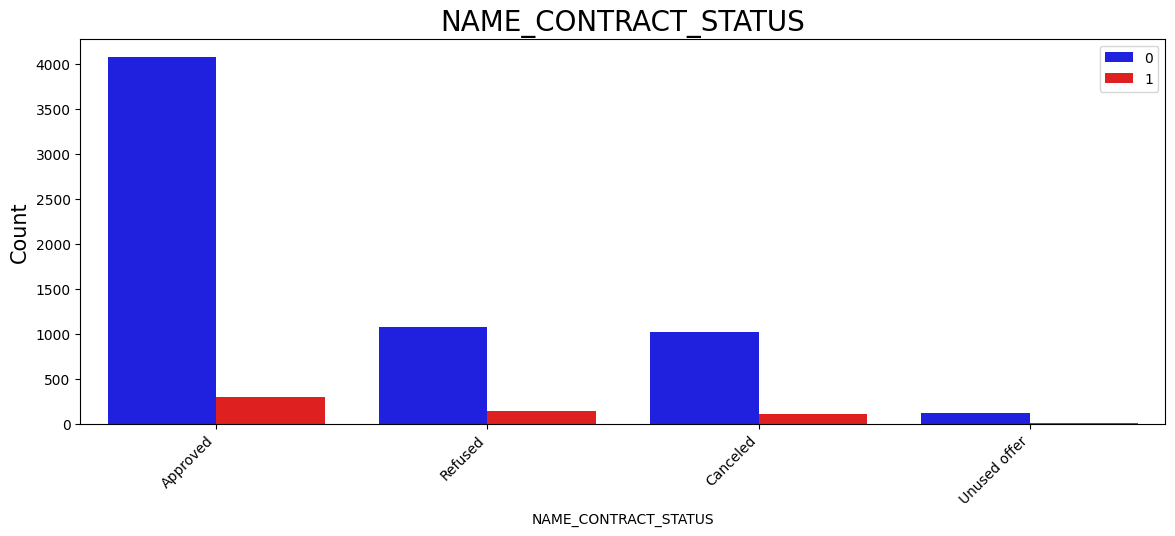

Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0         4078     93.19%
                     1          298      6.81%
Canceled             0         1016     90.47%
                     1          107      9.53%
Refused              0         1074     88.18%
                     1          144     11.82%
Unused offer         0          119     95.97%
                     1            5      4.03%

In [ ]:
# Checking Contract Status based on loan repayment status whether there is any business loss or financial loss

univariate_c_merged("NAME_CONTRACT_STATUS",loan_df,"TARGET",['b','r'],False,(14,5))
r = loan_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([r.value_counts(),round(r.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
df1

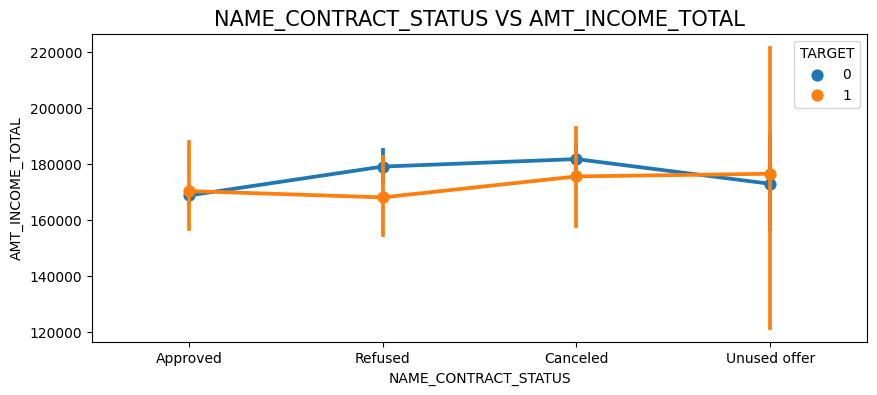

In [ ]:
# plotting the relationship between income total and contact status

pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

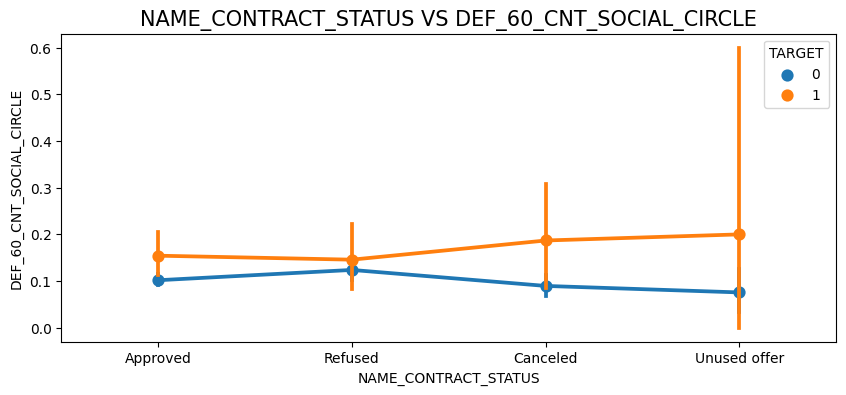

In [ ]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status

pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

# **Identify Top Correlations for Different Scenarios**

In [ ]:
# Getting  top 10 correlation for the Repayers dataframe

corr_repayer = Repayer_df.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool_)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs()
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_repayer.head(10)

<ipython-input-206-b7872952de8c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_repayer = Repayer_df.corr()


,VAR1,VAR2,Correlation
61,AMT_GOODS_PRICE,AMT_CREDIT,0.987000
62,AMT_GOODS_PRICE,AMT_ANNUITY,0.775835
41,AMT_ANNUITY,AMT_CREDIT,0.770772
125,DAYS_EMPLOYED,DAYS_BIRTH,0.623475
40,AMT_ANNUITY,AMT_INCOME_TOTAL,0.451136
60,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.384576
20,AMT_CREDIT,AMT_INCOME_TOTAL,0.377966
145,DAYS_REGISTRATION,DAYS_BIRTH,0.335028
166,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.274516
165,DAYS_ID_PUBLISH,DAYS_BIRTH,0.270073


<ipython-input-210-3e9394043452>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)


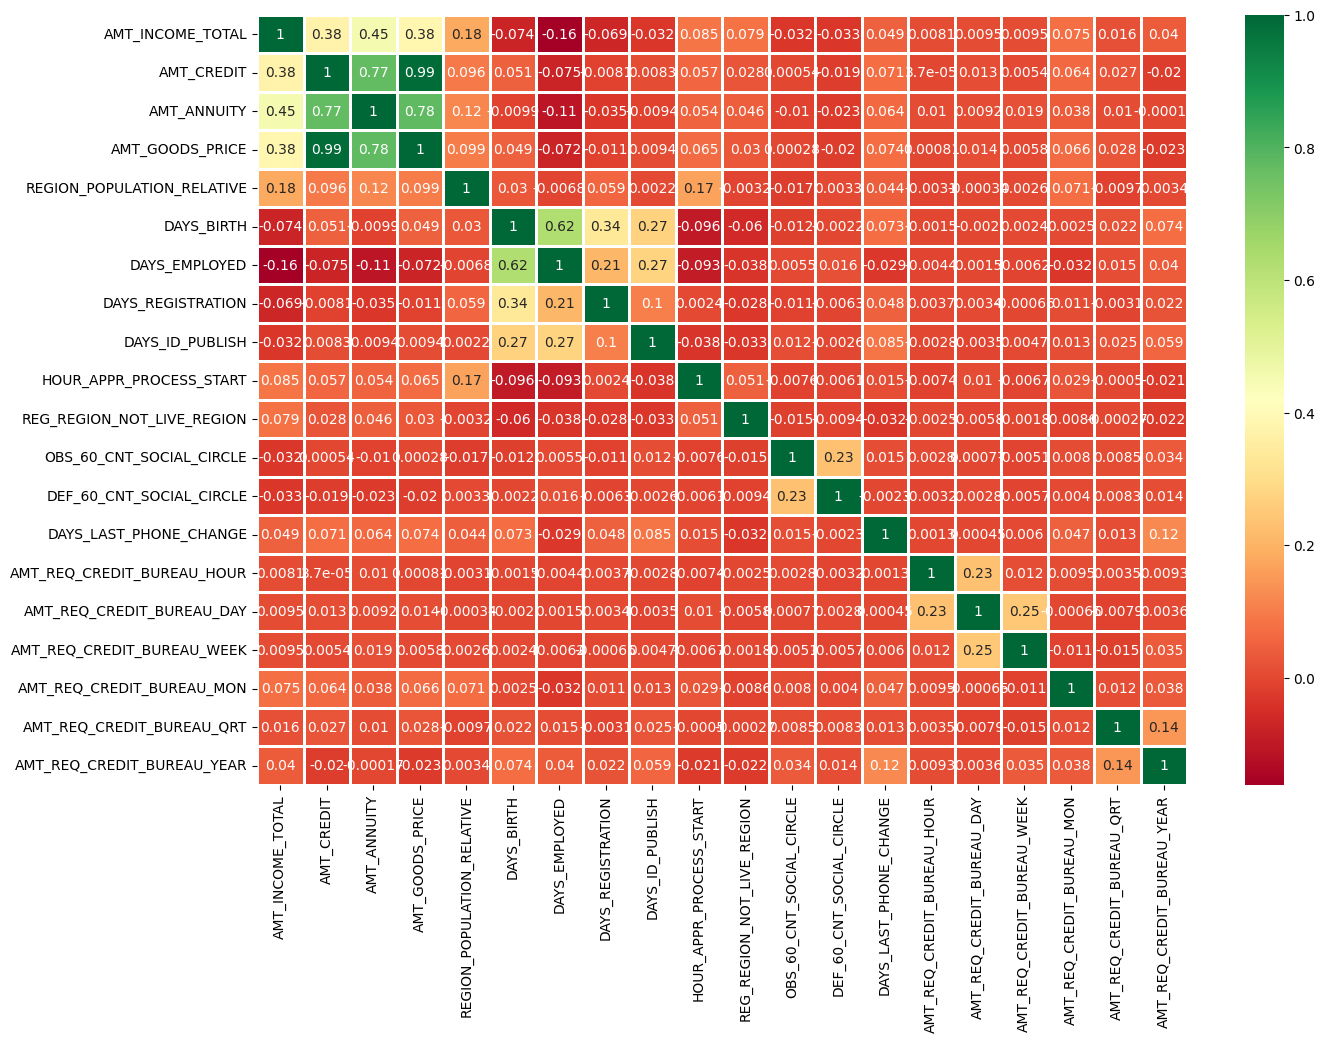

In [ ]:

#plotting heatmap to see linear correlation amoung Repayers

fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

<ipython-input-211-35864cc134f3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)


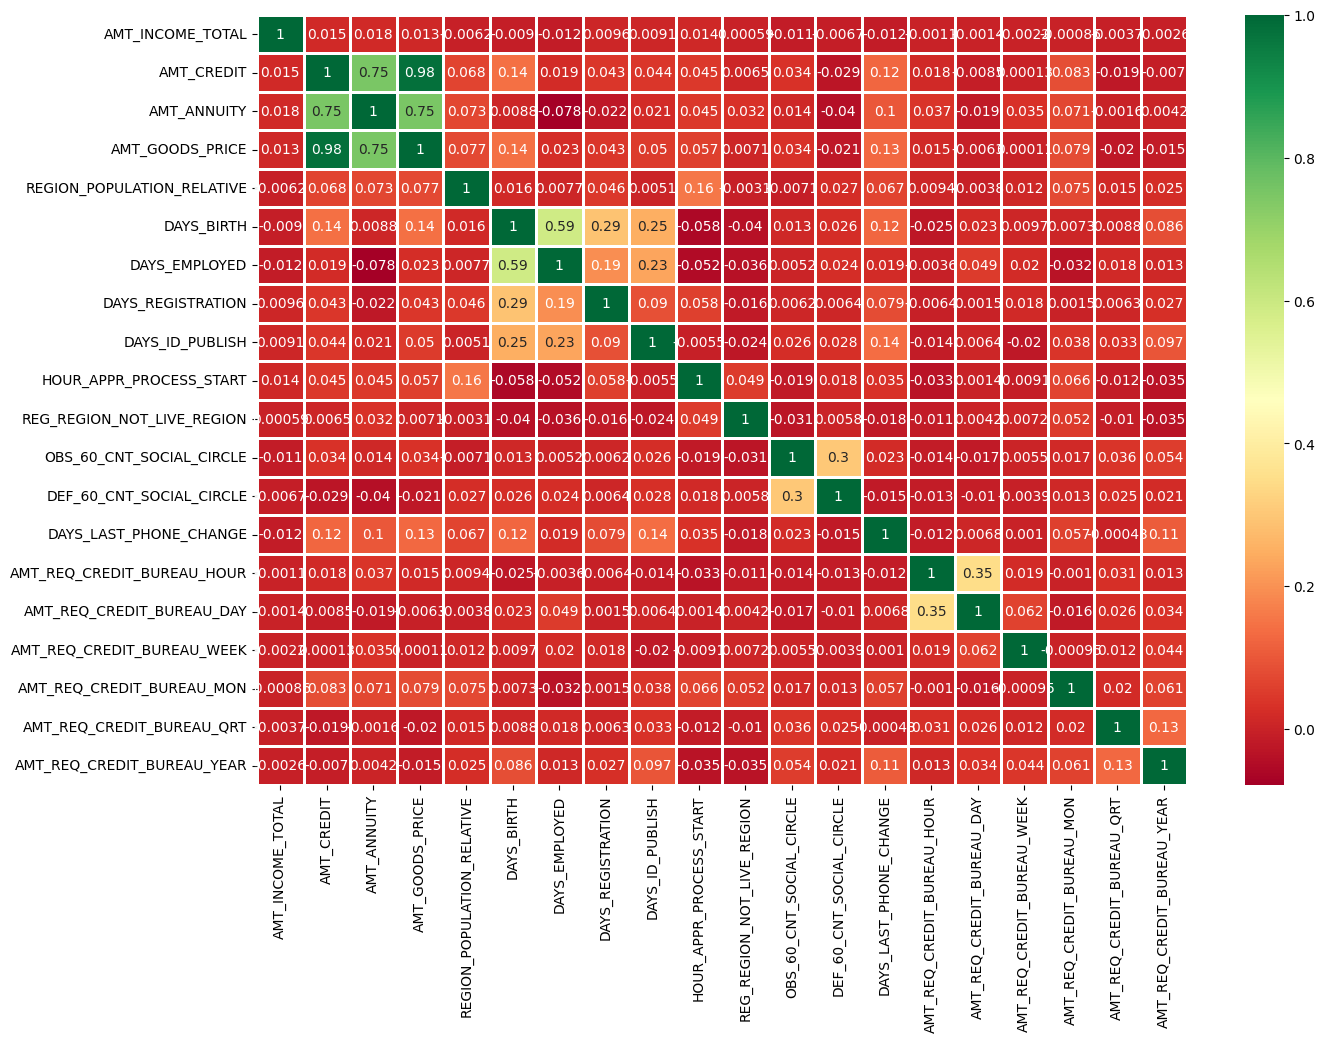

In [ ]:
#plotting heatmap to see linear correlation amoung Repayers

fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)